In [307]:
#!pip install jyquickhelper
#Pour la table des matières
from jyquickhelper import add_notebook_menu

#Pour les api et données requetables
import requests

####################################################Les packages nécessaires###################################################
import pandas as pd
# Import seaborn
import seaborn as sns
#default theme
sns.set_theme()
import matplotlib.pyplot as plt
%matplotlib inline
################################################################################################################################

#Pour afficher toutes les colonnes des bases de données 
pd.set_option('display.max_columns', None)
add_notebook_menu()

In [308]:
#Ajout de ligne

## <center>1. Importation des données</center>

In [309]:
#Racine principale de récupération des données
glob_path = "https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset="

### 1.2 Vœux de poursuite d'études et de réorientation dans l'enseignement supérieur et réponses des établissements



https://data.enseignementsup-recherche.gouv.fr/explore/dataset/fr-esr-parcoursup/information/

###### On a 12760 lignes d'individus et l'Api ne permet pas de récupérer plus de 10 000 lignes et donc on a troué comme astuce de récupérer selon le type de l'établissement avant de merger les bases


In [310]:
#Segmentation pour pouvoir tout récupérer car l'API n'autorise pas plus de 10 000 lignes 
type_etablissement = ["2_Lyc%C3%A9es", "1_Universit%C3%A9s", "3_Autres+formations"]


In [315]:
#Le lien de récupération
voeux_poursuite = glob_path+"fr-esr-parcoursup&rows=6020&sort=tri&facet=session&facet=contrat_etab&facet=cod_uai&facet=g_ea_lib_vx&facet=dep_lib&facet=region_etab_aff&facet=acad_mies&facet=select_form&facet=fili&facet=form_lib_voe_acc&facet=regr_forma&facet=fil_lib_voe_acc&facet=detail_forma&facet=tri&facet=cod_aff_form&q="


In [316]:
#Récupération selon le type d'établissement
data_etablissement = [requests.get(voeux_poursuite + type_etablissement[x]) for x in range(3)]

In [317]:
#Vérification
data_etablissement

[<Response [200]>, <Response [200]>, <Response [200]>]

In [318]:
#Conversion de json à pd.Dataframe
data_etablissement = [pd.json_normalize(x.json()['records'][:]) for x in data_etablissement ]

In [319]:
glob_data = pd.concat(data_etablissement)
glob_data.columns = [c.replace('fields.', '') for c in list(glob_data.columns) ]

### Fouille des données et Statistiques descriptives 

In [320]:
glob_data.shape[1]

120

In [13]:
df = glob_data.copy()


In [11]:
names = {'session' : 'session' ,
        'cod_uai' : 'Identifiant del_établissement' , 
        'g_ea_lib_vx' : 'Identifiant del_établissement' , 
        'dep' : 'code département al del_établisseme nt' , 
        'dep_lib' : 'département de l_établissement' , 
        'region_etab_aff' : 'Région de l_établissement' , 
        'acad_mies' : 'académie de l_établissement' , 
        'fili':'filière de formation très agrégée',
        'contrat_etab':'statut de l_établisseme nt de la filière de formation(public, privé…)', 
        'lib_for_voe_ins':'filière deformation', 
        'select_form':'select_fromat : prend 1 si la formation est sélective, 0 sinon',
        'lib_comp_voe_ins':'filière de formation détaillée', 
        'detail_forma':'filière de formationtrès détaillée', 
        'lien_form_psup':'lien de la formation sur la plateforme parcoursup', 
        'géolocalisation_ des_formations':'coordonnées gps de la formation', 
        'capa_fin':'capacité de l_établisseme nt parformation', 
        'voe_tot':'Effectif total des candidatspour une formation', 
        'voe_tot_f':'dont effectif des candidatespour une formation', 

  'nb_voe_pp' : 'Effectif total des candidats en phaseprincipale' ,  
  'nb_voe_pp_internat' : 'Effectif total des candidats ayant postulé en internat' ,  
  'nb_voe_pp_bg' : 'Effectif des candidats en terminale générale en phase principale' ,  
  'nb_voe_pp_bg_brs' : 'dont effectif des candidats boursiers en terminale générale en phase principale' ,  
  'nb_voe_pp_bt' : 'Effectif des candidats néo en terminale technologique en phase principale' ,  
  'nb_voe_pp_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e en phaseprincipale' ,  
  'nb_voe_pp_bp' : 'Effectif des candidats néo bacheliers en terminalepro en phase principale' ,  
  'nb_voe_pp_bp_brs' : 'dont effectif des candidats boursiers néo bacheliers en terminale pro en phaseprincipale' ,  
  'nb_voe_pp_at' : 'Effectif des autres candidats en phaseprincipale' ,  
  'nb_voe_pc' : 'Effectif total des candidats en phasecomplément aire' ,  
'nb_voe_pc_bg' : 'Effectif des candidats en terminale générale en' ,
  '' : 'phase complémentaire' ,  
  'nb_voe_pc_bt' : 'Effectif des candidats en terminale technologiqu e en phase complémentaire' ,  
  'nb_voe_pc_bp' : 'Effectif des candidats en terminale pro en phase complémentaire' ,  
  'nb_voe_pc_at' : 'Effectifs des autres candidats en phase complémentaire' ,  
  'nb_cla_pp' : 'Effectif total des candidats classés par l_établisseme nt en phaseprincipale' ,  
  'nb_cla_pc' : 'Effectif des candidats classés par l_établisseme nt en phase complémentaire' ,  
  'nb_cla_pp_internat' : 'Effectif des candidats classés par l_établisseme nt en internatcpgE' ,  
  'nb_cla_pp_pasinternat' : 'Effectif des candidats classés par l_établisseme nt hors internat(cpgE)' ,  
  'nb_cla_pp_bg' : 'Effectif des candidats en terminale générale classés parl_établisseme nt' ,  
  'nb_cla_pp_bg_brs' : 'dont effectif des candidats boursiers en terminale générale classés par l_établissement' ,  
  'nb_cla_pp_bt' : 'Effectif des candidats en terminale technologiqu e classés par l_établissement' ,  
  'nb_cla_pp_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e classés par l_établissement' ,  
  'nb_cla_pp_bp' : 'Effectif des candidats en terminale pro classés par l_établissement' ,  
  'nb_cla_pp_bp_brs' : 'dont effectif des candidats boursiers en terminale pro classés parl_établisseme nt' ,  
  'nb_cla_pp_at' : 'Effectif des autres candidats classés parl_établisseme nt' ,  
  'prop_tot' : 'Effectif total des candidats ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bg' : 'Effectif des candidats en terminale générale ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_bg_brs' : 'dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_bt' : 'Effectif des candidats en terminale technologiqu e ayant reçu une propositiond_admission' ,  
  '' : 'de la part de l_établissement' ,  
  'prop_tot_bt_brs' : 'dont effectif des candidats boursiers en terminale technologiqu e ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bp' : 'Effectif des candidats en terminale professionne lle ayant reçu une proposition d_admission de la part del_établisseme nt' ,  
  'prop_tot_bp_brs' : 'dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'prop_tot_at' : 'Effectif des autres candidats ayant reçu une proposition d_admission de la part de l_établissement' ,  
  'acc_tot' : 'Effectif total des candidats ayant accepté la proposition del_établisseme nt (admis)' ,  
  'acc_tot_f' : 'dont effectif des candidates admises' ,  
  'acc_pp' : 'Effectif des admis en phase principale' ,  
  'acc_pc' : 'Effectif des admis en phase complémentaire' ,  
  'acc_internat' : 'dont effectif des admis en internat' ,  
  'acc_brs' : 'dont effectif des admis boursiers néo bacheliers' ,  
  'acc_debutpp' : 'dont effectif des admis ayant reçu leur proposition d_admission le 15 mai (ouverture pp)' ,  
  'acc_datebac' : 'dont effectif des admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin)' ,  
  'acc_finpp' : 'dont effectif des admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet)' ,  
  'acc_neobac' : 'Effectif des admis néobacheliers' ,  
  'acc_bg' : 'Effectif des admis néo bacheliers généraux' ,  
  'acc_bt' : 'Effectif des admis néo bacheliers technologiques' ,  
  'acc_bp' : 'Effectif des admis néo bacheliers professionnels' ,  
  'acc_at' : 'Effectif des autres candidats admis' ,  
  'acc_mention_non renseignee' : 'dont effectif des admis néo bacheliers sans information sur la mention au bac' ,  
  'acc_sansmention' : 'dont effectif des admis néo bacheliers sans mention au bac' ,  
  'acc_ab' : 'dont effectif des admis néo bacheliers avec mention assez Bien au bac' ,  
  'acc_b' : 'dont effectif des admis néo bacheliers avec mention Bien au bac' ,  
  'acc_tb' : 'dont effectif des admis néo bacheliers avec mention Très Bien au bac' ,  
  'acc_bg_mention' : 'Effectif des admis néo bacheliers généraux ayant eu une mention au bac' ,  
  'acc_bt_mention' : 'Effectif des admis néo bacheliers technologiqu es ayant eu une mention au bac' ,  
  'acc_bp_mention' : 'Effectif des admis néo bacheliers professionne ls ayant eu une mention au bac' ,  
  'acc_term' : 'dont effectif des admis néo bacheliers issus du même établissemen t (BTs/cpgE)' ,  
  'acc_term_f' : 'dont effectif des admises néo bachelières issues du même établissemen t (BTs/cpgE)' ,  
  'acc_aca_orig' : 'dont effectif des admis néo bacheliers issus de la même académie' ,  
  'acc_aca_orig_idf' : 'dont effectif des admis néo bacheliers issus de la même académie (paris/crétei l/versailles réunies)' ,  
  'pct_f' : '% ayant accepté selon le sexe.' ,
  'pct_aca_orig' : '% d_admis néo bacheliers issus de la même académie' ,  
  'pct_aca_orig_idf' : '% d_admis néo bacheliers issus de la même académie (paris/créteil/versailles réunies)' ,  
  'pct_etab_orig' : '% d_admis néo bacheliers issus du même établissemen t (BTs/cpgE)' ,  
  'pct_bours' : '% d_admis néo bacheliers boursiers' ,  
  'pct_acc_debutpp' : '% d_admis ayant reçu leur proposition d_admission le 15 mai (ouverturepp)' ,  
  'pct_acc_datebac' : '% d_admis ayant reçu leur proposition d_admission avant le baccalauréat (18 juin)' ,  
  'pct_acc_finpp' : '% d_admis ayant reçu leur proposition d_admission avant la fin de la procédure principale (19 juillet)' ,  
  'pct_neobac' : '% d_admis néobacheliers' ,  
  'pct_mention_nonrenseignee' : '% d_admis néo bacheliers sans information sur la mention au bac' ,  
  'pct_sansmention' : '% d_admis néo bacheliers sans mention au bac' ,  
  'pct_ab' : '% d_admis néo bacheliers avec mention assez Bien au bac' ,  
  'pct_b' : '% d_admis néo bacheliers avec mention Bien au bac' ,  
  'pct_tb' : '% d_admis néo bacheliers avec mention Très Bien au bac' ,  
  'pct_bg' : '% d_admis néo bacheliers généraux' ,  
  'pct_bg_mention' : 'dont % d_admis avec mention' ,  
  'pct_bt' : '% d_admis néo bacheliers technologiques' ,  
  'pct_bt_mention' : 'dont % d_admis avec mention' ,
  'pct_bp' : '% d_admis néo bacheliers professionnels' ,  
  'pct_bp_mention' : 'dont % d_admis avec mention' ,  
  'lib_grp1' : 'Regroupeme nt 1 effectué par les formations pour les classements' ,  
  'ran_grp1' : 'Rang du dernier appelé du groupe 1' ,  

  'lib_grp2' : 'Regroupeme nt 2 effectué par les formations pour les classements' ,  
  'ran_grp2' : 'Rang du dernier appelé du groupe 2' ,  
  'lib_grp3' : 'Regroupeme nt 3 effectué par les formations pour les classements' ,  
  'ran_grp3' : 'Rang du dernier appelé du groupe 3' ,  
  'lib_grp4' : 'Regroupeme nt 4 effectué par les formations pour les classements' ,  
  'ran_grp4' : 'Rang du dernier appelé du groupe 4' ,  
  'lib_grp5' : 'Regroupeme nt 5 effectué par les formations pour lesc classements' ,  
  'ran_grp5' : 'Rang du dernier appelé du groupe 5' ,  
  
}


In [12]:
df.rename(columns = names)

datasetid                                  recordid  \
0     fr-esr-parcoursup  5ddd4059ccae7206ae2f39b37d08495258e52dff   
1     fr-esr-parcoursup  a7f51872796481d96bbfcc6cfcc1fd13a8a291c3   
2     fr-esr-parcoursup  94819eeabba33cc018ac8925f34d5b6fa795f0cd   
3     fr-esr-parcoursup  119257913ef26bbfcdf0d2c46ab5ad87cc01a73e   
4     fr-esr-parcoursup  74cdb514e03d75697a427dad4c50159336faf3b7   
...                 ...                                       ...   
2669  fr-esr-parcoursup  626728d39bff75d6c1294bcaf2014255adb18db6   
2670  fr-esr-parcoursup  64b4b56a2fdb0395b499f75fabfb6929acbf315b   
2671  fr-esr-parcoursup  e10c8646dbe5b5afa223f6cf10184e1654018576   
2672  fr-esr-parcoursup  1a9a34d69898c019c2cb6088f03674fc73c8c777   
2673  fr-esr-parcoursup  a2091539b6a55fdd2c53b1ce1bf436670d49b2aa   

                      record_timestamp  \
0     2021-02-04T13:10:28.998000+00:00   
1     2021-02-04T13:10:28.998000+00:00   
2     2021-02-04T13:10:28.998000+00:00   
3     2021-02-04T13:10:28.998000+00:00   
4     2021-02-04T13:10:28.998000+00:00   
...                                ...   
2669  2021-02-04T13:10:28.998000+00:00   
2670  2021-02-04T13:10:28.998000+00:00   
2671  2021-02-04T13:10:28.998000+00:00   
2672  2021-02-04T13:10:28.998000+00:00   
2673  2021-02-04T13:10:28.998000+00:00   

      Effectif des autres candidats en phaseprincipale  \
0                                                   21   
1                                                    9   
2                                                  158   
3                                                  113   
4                                                  256   
...                                                ...   
2669                                                 0   
2670                                                 0   
2671                                                 0   
2672                                                 0   
2673                                                 0   

      Effectif des candidats néo bacheliers en terminalepro en phase principale  \
0                                                    19                           
1                                                     8                           
2                                                    26                           
3                                                    38                           
4                                                   114                           
...                                                 ...                           
2669                                                  0                           
2670                                                  0                           
2671                                                  0                           
2672                                                  0                           
2673                                                  0                           

      Effectif des candidats en terminale générale en phase principale  \
0                                                     4                  
1                                                     3                  
2                                                    28                  
3                                                    61                  
4                                                   134                  
...                                                 ...                  
2669                                                  0                  
2670                                                  0                  
2671                                                  0                  
2672                                                  0                  
2673                                                  0                  

      % d_admis néo bacheliers sans mention au bac  \
0                                        30

In [14]:
##Modifier les indexes
df.set_index('g_ea_lib_vx',inplace=True)


In [15]:
df.select_dtypes('object').columns
#Certaines variables de types numeric enrégistrées comme catégorielles à corriger
df[['ran_grp2','ran_grp3', 'ran_grp4', 'ran_grp5','pct_etab_orig']] = df[['ran_grp2','ran_grp3', 'ran_grp4', 'ran_grp5','pct_etab_orig']].astype('float64', copy=True)
#Variables categorielles
df_c=df.select_dtypes('object')
#Variables numériques
df_n=df.select_dtypes('number')

In [16]:
stats=df_n.describe()

In [17]:
sum(df['nb_voe_pp_at'])

2842825

In [18]:
names = ['Session','Statut de l’établissement de la filière de formation (public, privé…)','Code UAI de l''établissement','Établissement','Code départemental de l’établissement','Département de l’établissement','Région de l’établissement','Académie de l’établissement','Sélectivité','Filière de formation très agrégée','Filière de formation détaillée','Filière de formation','Concours communs et banques d''épreuves','Filière de formation détaillée','Filière de formation très détaillée','Lien de la formation sur la plateforme Parcoursup','Coordonnées GPS de la formation','Capacité de l’établissement par formation','Effectif total des candidats pour une formation','Dont effectif des candidates pour une formation','Effectif total des candidats en phase principale','Dont effectif des candidats ayant postulé en internat','Effectif des candidats néo bacheliers généraux en phase principale','Dont effectif des candidats boursiers néo bacheliers généraux en phase principale','Effectif des candidats néo bacheliers technologiques en phase principale','Dont effectif des candidats boursiers néo bacheliers technologiques en phase principale','Effectif des candidats néo bacheliers professionnels en phase principale','Dont effectif des candidats boursiers néo bacheliers professionnels en phase principale','Effectif des autres candidats en phase principale','Effectif total des candidats en phase complémentaire','Effectif des candidats néo bacheliers généraux en phase complémentaire','Effectif des candidats néo bacheliers technologique en phase complémentaire','Effectif des candidats néo bacheliers professionnels en phase complémentaire','Effectifs des autres candidats en phase complémentaire','Effectif total des candidats classés par l’établissement en phase principale','Effectif des candidats classés par l’établissement en phase complémentaire','Effectif des candidats classés par l’établissement en internat (CPGE)','Effectif des candidats classés par l’établissement hors internat (CPGE)','Effectif des candidats néo bacheliers généraux classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers généraux classés par l’établissement','Effectif des candidats néo bacheliers technologiques classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers technologiques classés par l’établissement','Effectif des candidats néo bacheliers professionnels classés par l’établissement','Dont effectif des candidats boursiers néo bacheliers professionnels classés par l’établissement','Effectif des autres candidats classés par l’établissement','Effectif total des candidats ayant reçu une proposition d’admission de la part de l’établissement','Effectif total des candidats ayant accepté la proposition de l’établissement (admis)','Dont effectif des candidates admises','Effectif des admis en phase principale','Effectif des admis en phase complémentaire','Dont effectif des admis ayant reçu leur proposition d’admission à l''ouverture de la procédure principale','Dont effectif des admis ayant reçu leur proposition d’admission avant le baccalauréat','Dont effectif des admis ayant reçu leur proposition d’admission avant la fin de la procédure principale','Dont effectif des admis en internat','Effectif des admis néo bacheliers technologiques ayant eu une mention au bac','Effectif des admis néo bacheliers professionnels ayant eu une mention au bac','Dont effectif des admis issus du même établissement (BTS/CPGE)','Dont effectif des admises issues du même établissement (BTS/CPGE)','Dont effectif des admis issus de la même académie','Dont effectif des admis issus de la même académie (Paris/Créteil/Versailles réunies)','% d’admis ayant reçu leur proposition d’admission à l''ouverture de la procédure principale','% d’admis ayant reçu leur proposition d’admission avant le baccalauréat','% d’admis ayant reçu leur proposition d’admission avant la fin de la procédure principale','% d’admis dont filles','% d’admis néo bacheliers issus de la même académie','% d’admis néo bacheliers issus de la même académie (Paris/Créteil/Versailles réunies)','% d’admis néo bacheliers issus du même établissement (BTS/CPGE)','% d’admis néo bacheliers boursiers','% d’admis néo bacheliers','% d’admis néo bacheliers sans information sur la mention au bac','% d’admis néo bacheliers sans mention au bac','% d’admis néo bacheliers avec mention Assez Bien au bac','% d’admis néo bacheliers avec mention Bien au bac','% d’admis néo bacheliers avec mention Très Bien au bac','% d’admis néo bacheliers généraux','Dont % d’admis avec mention','% d’admis néo bacheliers technologiques','Dont % d’admis avec mention','% d’admis néo bacheliers professionnels','Dont % d’admis avec mention','Effectif des candidats en terminale générale ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale générale ayant reçu une proposition d’admission de la part de l’établissement','Effectif des candidats en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale technologique ayant reçu une proposition d’admission de la part de l’établissement','Effectif des candidats en terminale professionnelle ayant reçu une proposition d’admission de la part de l’établissement','Dont effectif des candidats boursiers en terminale générale professionnelle ayant reçu une proposition d’admission de la part de l’établissement','Effectif des autres candidats ayant reçu une proposition d’admission de la part de l’établissement','Regroupement 1 effectué par les formations pour les classements','Rang du dernier appelé du groupe 1','Regroupement 2 effectué par les formations pour les classements','Rang du dernier appelé du groupe 2','Regroupement 3 effectué par les formations pour les classements','Rang du dernier appelé du groupe 3','Regroupement 4 effectué par les formations pour les classements','Rang du dernier appelé du groupe 4','Regroupement 5 effectué par les formations pour les classements','Rang du dernier appelé du groupe 5','Indicateur Parcoursup du taux d’accès des candidats ayant postulé à la formation (ratio entre le dernier appelé et le dernier classé)','Dont taux d’accès des candidats ayant un bac professionnel ayant postulé à la formation','Dont taux d’accès des candidats ayant un bac général ayant postulé à la formation','Dont taux d’accès des candidats ayant un bac technologique ayant postulé à la formation','tri']


In [19]:
len(names)

102

In [20]:
stats

nb_voe_pp_at  nb_voe_pp_bp  nb_voe_pp_bg  pct_sansmention  \
count  12760.000000  12760.000000  12760.000000     12601.000000   
mean     222.791928     63.848511    380.880251        29.845946   
std      463.296751    107.427396    810.847901        23.133849   
min        0.000000      0.000000      0.000000         0.000000   
25%       37.000000      3.000000     25.000000         9.677419   
50%       95.000000     26.000000     97.000000        28.571429   
75%      215.000000     75.000000    382.000000        45.967742   
max     6209.000000   1446.000000  14914.000000       100.000000   

            acc_brs        acc_bg  acc_bg_mention  prop_tot_bp_brs  \
count  12760.000000  12760.000000    12760.000000     12760.000000   
mean       9.911677     26.632053       19.522884         7.386991   
std       17.872469     63.401771       50.923177        12.106941   
min        0.000000      0.000000        0.000000         0.000000   
25%        2.000000      2.000000        1.000000         0.000000   
50%        5.000000      7.000000        4.000000         3.000000   
75%       11.000000     26.000000       19.000000        10.000000   
max      341.000000   1401.000000     1386.000000       393.000000   

       taux_adm_psup_gen  pct_bp_mention      ran_grp3     acc_finpp  \
count       11698.000000    12601.000000   3847.000000  12760.000000   
mean           50.230894       17.698738     54.006499     46.761599   
std            33.763627       21.309215    235.892865     78.710696   
min             0.000000        0.000000      1.000000      0.000000   
25%            18.000000        0.000000     18.500000     15.000000   
50%            50.000000        8.000000     36.000000     25.000000   
75%            80.000000       31.580000     62.000000     45.000000   
max           100.000000      100.000000  10044.000000   1526.000000   

             acc_pc  nb_cla_pp_bg        acc_bt  nb_cla_pp_bt_brs  \
count  12760.000000  12760.000000  12760.000000      12760.000000   
mean       4.731740    309.672179      8.313636         25.545925   
std       15.358778    679.835142     11.331093         45.854514   
min        0.000000      0.000000      0.000000          0.000000   
25%        0.000000     19.000000      1.000000          2.000000   
50%        0.000000     68.000000      5.000000         10.000000   
75%        3.000000    305.000000     11.000000         29.000000   
max      350.000000  12340.000000    173.000000        693.000000   

       nb_voe_pp_bt  prop_tot_bg_brs  taux_adm_psup_pro  pct_aca_orig  \
count  12760.000000     12760.000000       11698.000000  12601.000000   
mean     127.427743        26.056583          21.406309     72.646146   
std      198.522070        53.934757          23.574079     25.279103   
min        0.000000         0.000000           0.000000      0.000000   
25%       15.000000         2.000000           0.000000     59.090000   
50%       61.000000         7.000000          13.000000     80.000000   
75%      150.000000        26.000000          38.000000     92.860000   
max     2553.000000       943.000000         100.000000    100.000000   

        prop_tot_bt        acc_pp       voe_tot     nb_voe_pp  \
count  12760.000000  12760.000000  12760.000000  12760.000000   
mean      37.063323     47.670063    829.426646    794.948433   
std       50.486630     82.361416   1232.570749   1233.402317   
min        0.000000      0.000000      0.000000      0.000000   
25%        5.000000     15.000000    194.000000    167.000000   
50%       23.000000     26.000000    414.000000    375.000000   
75%       48.000000     45.000000    903.000000    853.000000   
max     1178.000000   1530.000000  16266.000000  16266.000000   

       pct_acc_debutpp   prop_tot_bp        pct_tb  prop_tot_bt_brs  \
count     12695.000000  12760.000000  12601.000000     12760.000000   
mean         26.037591     18.408777     11.812738        11.002743   
std          21.796236     26.00371

In [21]:
#Valeurs manquantes ?
df.isna().sum().sort_values(ascending=False)
missings = pd.DataFrame(df.isna().sum().sort_values(ascending=False))
missings.rename(columns = {0 : 'Effectif'}, inplace = True)
missings['Vars'] = missings.index
missings.reset_index(drop=True, inplace=True)

In [22]:
missings['Effectif']=missings['Effectif']/glob_data.shape[0]*100
missings.rename(columns = {'Effectif' : 'Pourcentage de valeurs manquantes'}, inplace = True)

Text(0.5, 1.0, 'Pourcentage (%) des valeurs manquantes pour les variables de la base')

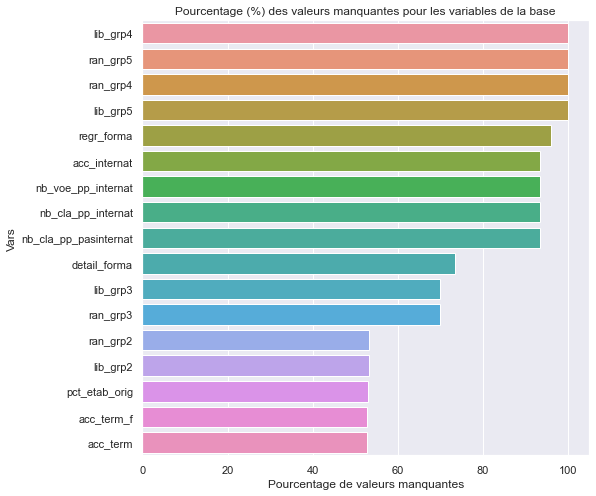

In [23]:
plt.subplots(figsize=(8, 8))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="Pourcentage de valeurs manquantes", y='Vars', data=missings[missings['Pourcentage de valeurs manquantes']>20])
plt.title('Pourcentage (%) des valeurs manquantes pour les variables de la base')


In [24]:
vars_50 = list(missings[missings['Pourcentage de valeurs manquantes']<50]['Vars'])
len(vars_50)

102

In [25]:
#1. Méthodes graphiques : Box-plot, nuage de points, histogrammes...

In [26]:
#histogramme
def graph(data):
    for colonne in data.columns:
        print('***************************************************************************')
        print('             :------------',colonne,'------------:')
        print('***************************************************************************')
        df[colonne].hist()
        plt.show()

***************************************************************************
             :------------ nb_voe_pp_at ------------:
***************************************************************************


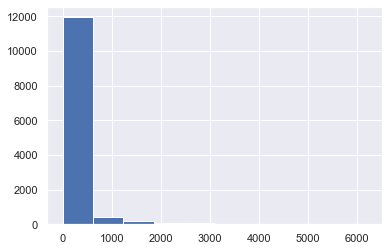

***************************************************************************
             :------------ nb_voe_pp_bp ------------:
***************************************************************************


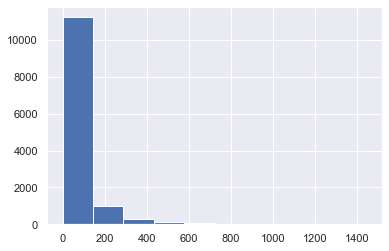

***************************************************************************
             :------------ nb_voe_pp_bg ------------:
***************************************************************************


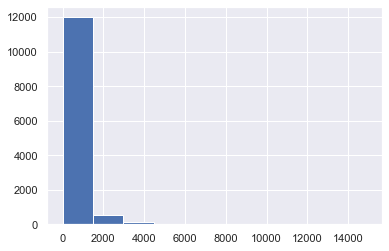

***************************************************************************
             :------------ pct_sansmention ------------:
***************************************************************************


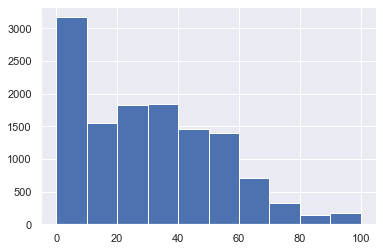

***************************************************************************
             :------------ acc_brs ------------:
***************************************************************************


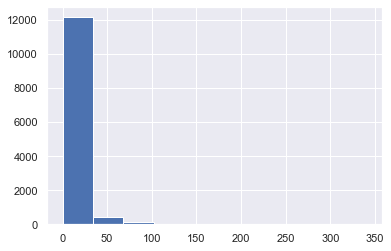

***************************************************************************
             :------------ acc_bg ------------:
***************************************************************************


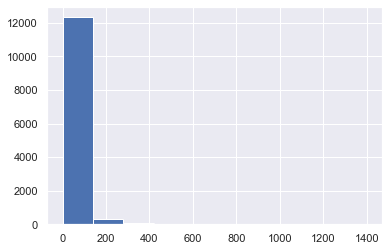

***************************************************************************
             :------------ acc_bg_mention ------------:
***************************************************************************


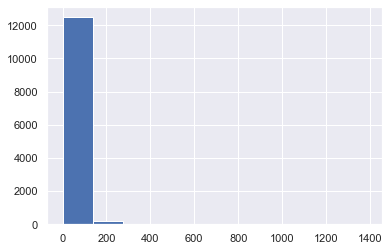

***************************************************************************
             :------------ prop_tot_bp_brs ------------:
***************************************************************************


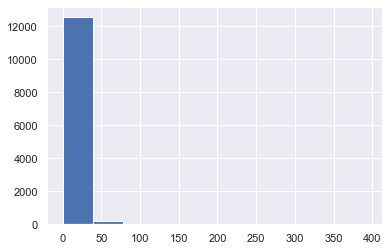

***************************************************************************
             :------------ taux_adm_psup_gen ------------:
***************************************************************************


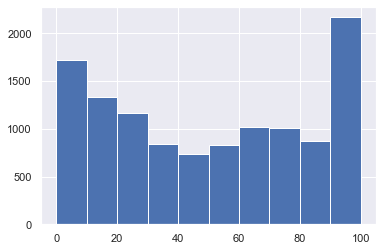

***************************************************************************
             :------------ pct_bp_mention ------------:
***************************************************************************


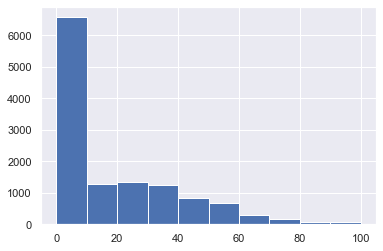

***************************************************************************
             :------------ ran_grp3 ------------:
***************************************************************************


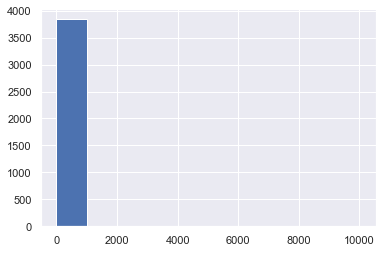

***************************************************************************
             :------------ acc_finpp ------------:
***************************************************************************


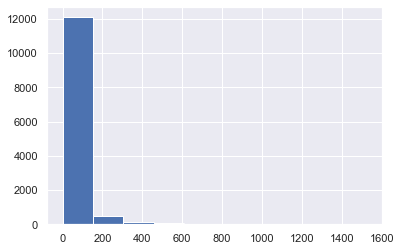

***************************************************************************
             :------------ acc_pc ------------:
***************************************************************************


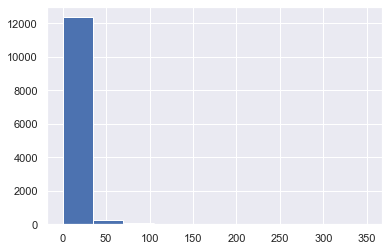

***************************************************************************
             :------------ nb_cla_pp_bg ------------:
***************************************************************************


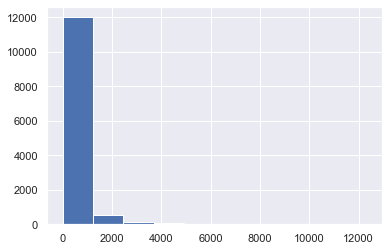

***************************************************************************
             :------------ acc_bt ------------:
***************************************************************************


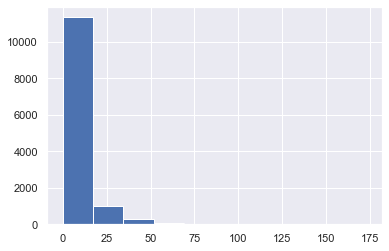

***************************************************************************
             :------------ nb_cla_pp_bt_brs ------------:
***************************************************************************


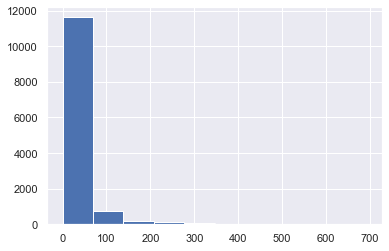

***************************************************************************
             :------------ nb_voe_pp_bt ------------:
***************************************************************************


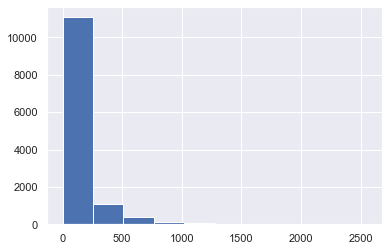

***************************************************************************
             :------------ prop_tot_bg_brs ------------:
***************************************************************************


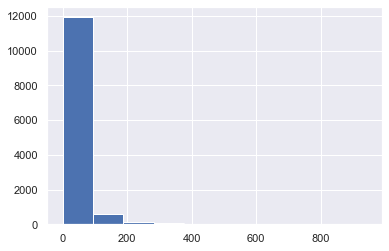

***************************************************************************
             :------------ taux_adm_psup_pro ------------:
***************************************************************************


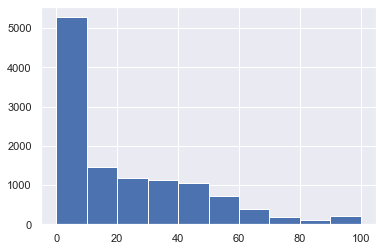

***************************************************************************
             :------------ pct_aca_orig ------------:
***************************************************************************


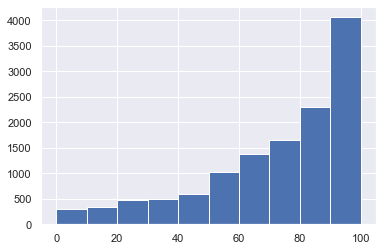

***************************************************************************
             :------------ prop_tot_bt ------------:
***************************************************************************


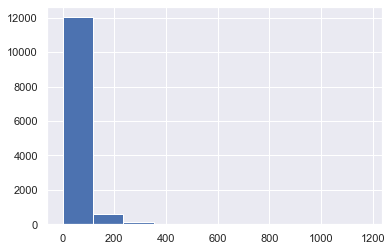

***************************************************************************
             :------------ acc_pp ------------:
***************************************************************************


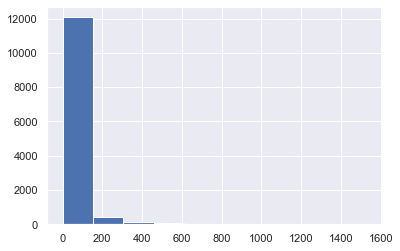

***************************************************************************
             :------------ voe_tot ------------:
***************************************************************************


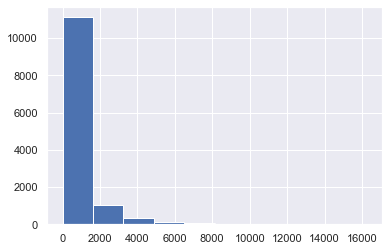

***************************************************************************
             :------------ nb_voe_pp ------------:
***************************************************************************


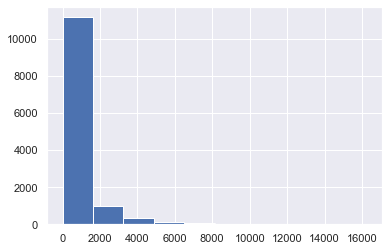

***************************************************************************
             :------------ pct_acc_debutpp ------------:
***************************************************************************


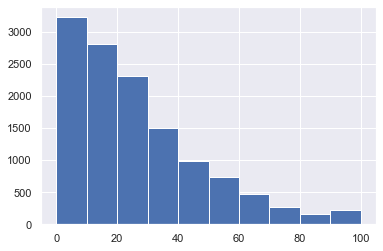

***************************************************************************
             :------------ prop_tot_bp ------------:
***************************************************************************


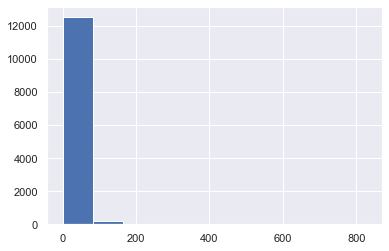

***************************************************************************
             :------------ pct_tb ------------:
***************************************************************************


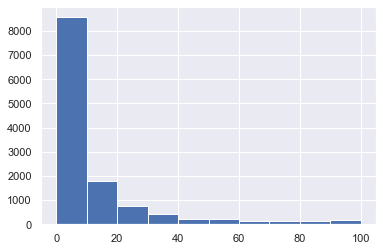

***************************************************************************
             :------------ prop_tot_bt_brs ------------:
***************************************************************************


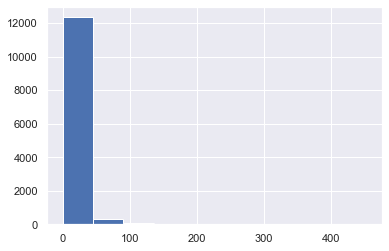

***************************************************************************
             :------------ pct_etab_orig ------------:
***************************************************************************


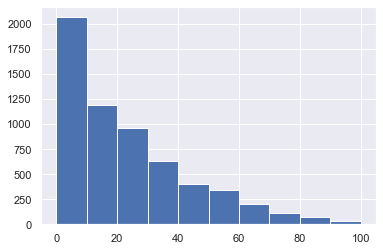

***************************************************************************
             :------------ pct_mention_nonrenseignee ------------:
***************************************************************************


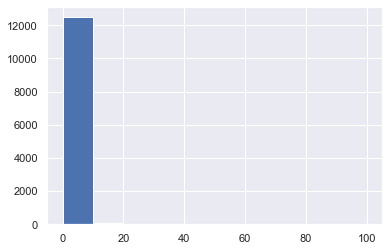

***************************************************************************
             :------------ acc_ab ------------:
***************************************************************************


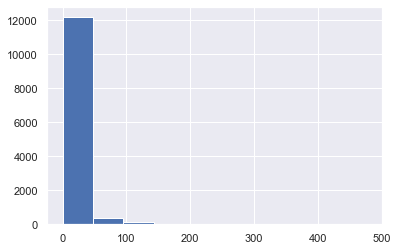

***************************************************************************
             :------------ acc_aca_orig ------------:
***************************************************************************


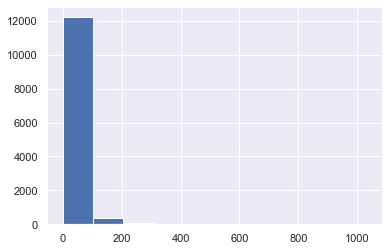

***************************************************************************
             :------------ pct_ab ------------:
***************************************************************************


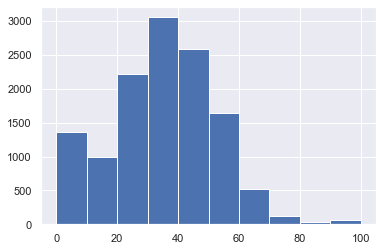

***************************************************************************
             :------------ nb_voe_pc_bp ------------:
***************************************************************************


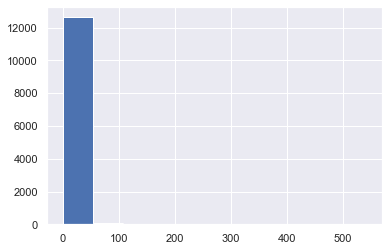

***************************************************************************
             :------------ pct_acc_finpp ------------:
***************************************************************************


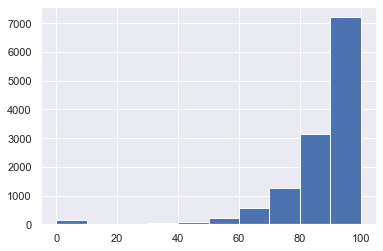

***************************************************************************
             :------------ nb_voe_pp_bg_brs ------------:
***************************************************************************


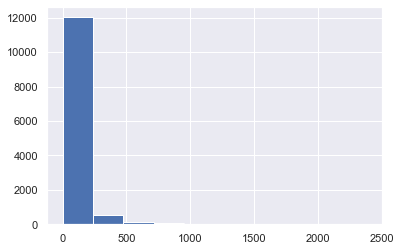

***************************************************************************
             :------------ nb_cla_pp_bp ------------:
***************************************************************************


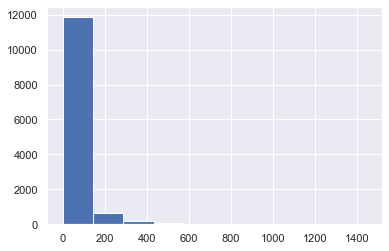

***************************************************************************
             :------------ ran_grp1 ------------:
***************************************************************************


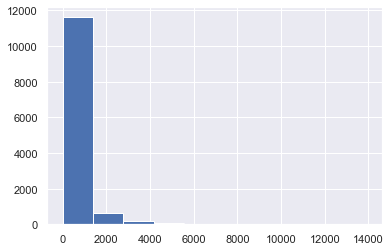

***************************************************************************
             :------------ pct_bg ------------:
***************************************************************************


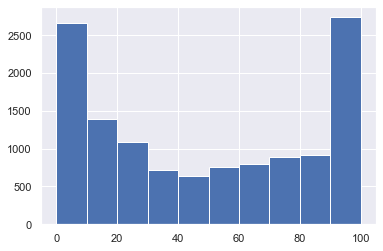

***************************************************************************
             :------------ pct_bours ------------:
***************************************************************************


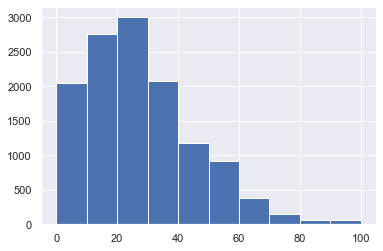

***************************************************************************
             :------------ nb_voe_pc_at ------------:
***************************************************************************


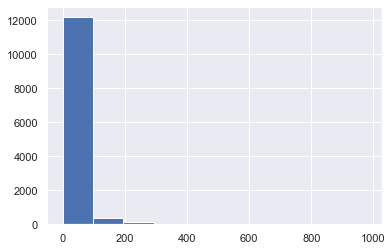

***************************************************************************
             :------------ acc_aca_orig_idf ------------:
***************************************************************************


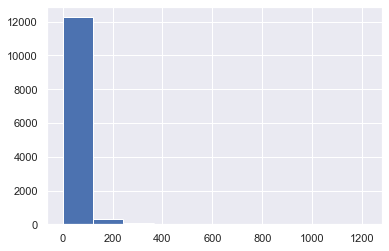

***************************************************************************
             :------------ pct_f ------------:
***************************************************************************


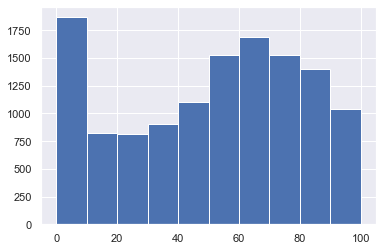

***************************************************************************
             :------------ acc_bt_mention ------------:
***************************************************************************


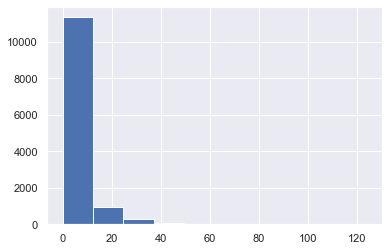

***************************************************************************
             :------------ nb_cla_pp ------------:
***************************************************************************


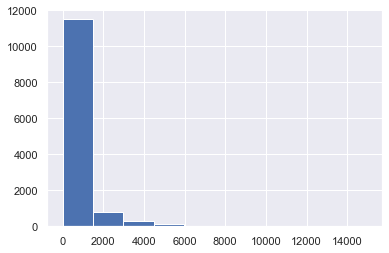

***************************************************************************
             :------------ acc_term ------------:
***************************************************************************


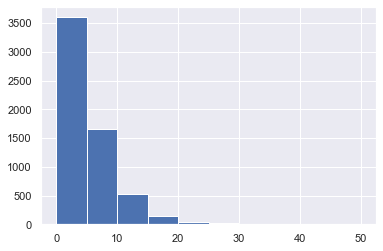

***************************************************************************
             :------------ prop_tot ------------:
***************************************************************************


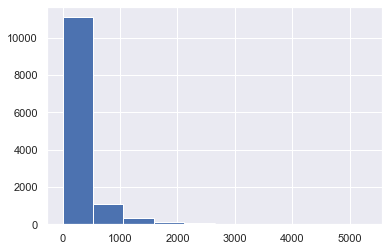

***************************************************************************
             :------------ nb_voe_pc_bt ------------:
***************************************************************************


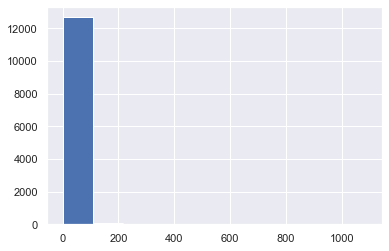

***************************************************************************
             :------------ acc_datebac ------------:
***************************************************************************


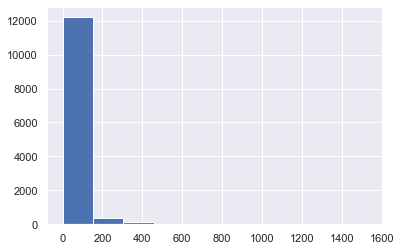

***************************************************************************
             :------------ acc_tot ------------:
***************************************************************************


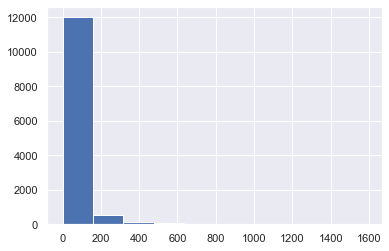

***************************************************************************
             :------------ nb_cla_pp_bg_brs ------------:
***************************************************************************


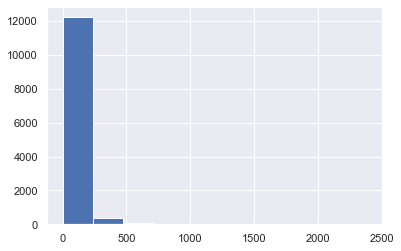

***************************************************************************
             :------------ pct_bt ------------:
***************************************************************************


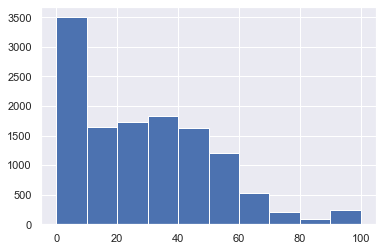

***************************************************************************
             :------------ prop_tot_bg ------------:
***************************************************************************


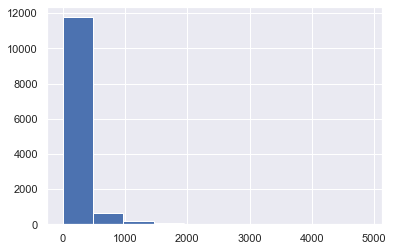

***************************************************************************
             :------------ nb_voe_pp_bt_brs ------------:
***************************************************************************


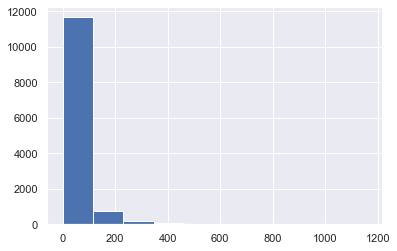

***************************************************************************
             :------------ acc_mention_nonrenseignee ------------:
***************************************************************************


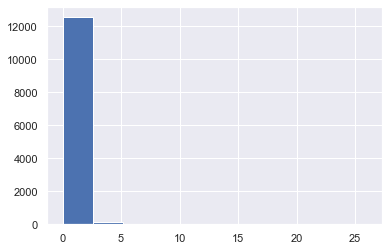

***************************************************************************
             :------------ nb_voe_pp_bp_brs ------------:
***************************************************************************


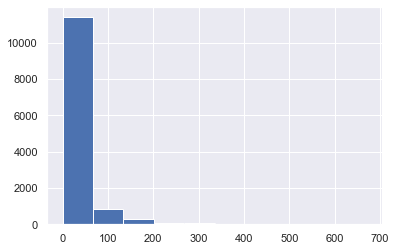

***************************************************************************
             :------------ acc_bp_mention ------------:
***************************************************************************


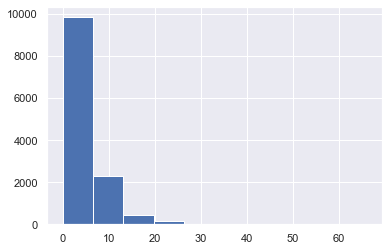

***************************************************************************
             :------------ acc_sansmention ------------:
***************************************************************************


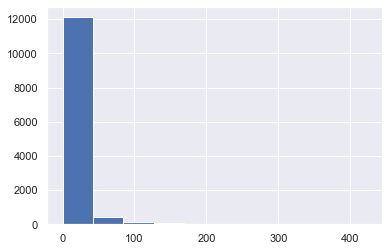

***************************************************************************
             :------------ acc_tb ------------:
***************************************************************************


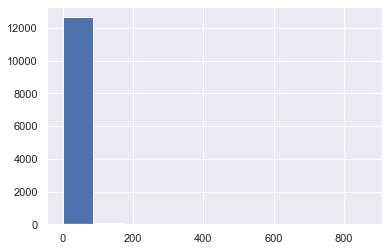

***************************************************************************
             :------------ prop_tot_at ------------:
***************************************************************************


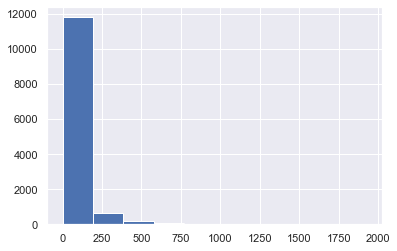

***************************************************************************
             :------------ capa_fin ------------:
***************************************************************************


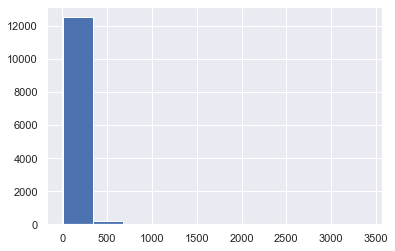

***************************************************************************
             :------------ acc_at ------------:
***************************************************************************


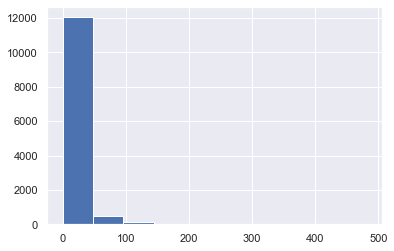

***************************************************************************
             :------------ nb_cla_pp_at ------------:
***************************************************************************


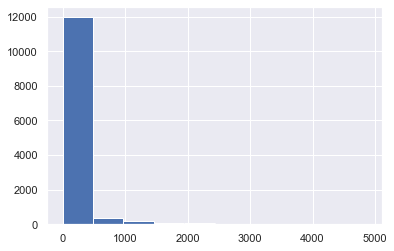

***************************************************************************
             :------------ acc_tot_f ------------:
***************************************************************************


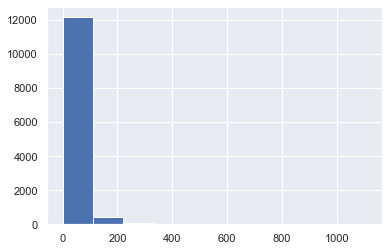

***************************************************************************
             :------------ voe_tot_f ------------:
***************************************************************************


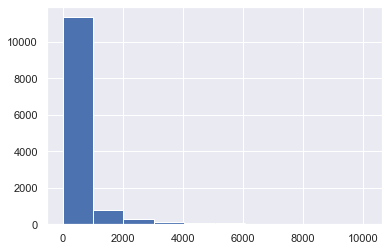

***************************************************************************
             :------------ acc_neobac ------------:
***************************************************************************


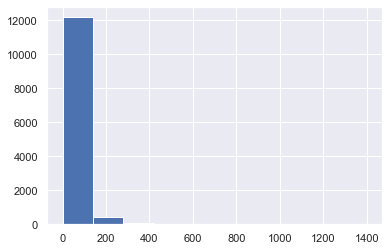

***************************************************************************
             :------------ nb_voe_pc ------------:
***************************************************************************


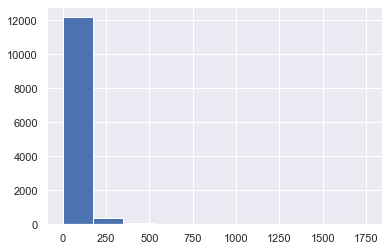

***************************************************************************
             :------------ pct_bg_mention ------------:
***************************************************************************


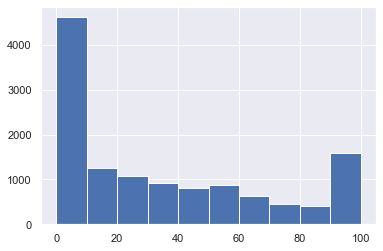

***************************************************************************
             :------------ pct_bp ------------:
***************************************************************************


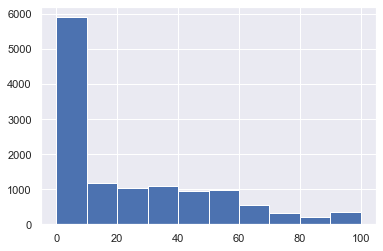

***************************************************************************
             :------------ acc_debutpp ------------:
***************************************************************************


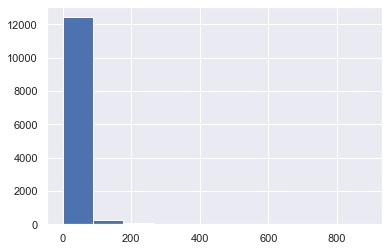

***************************************************************************
             :------------ acc_term_f ------------:
***************************************************************************


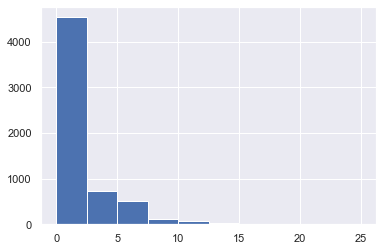

***************************************************************************
             :------------ pct_neobac ------------:
***************************************************************************


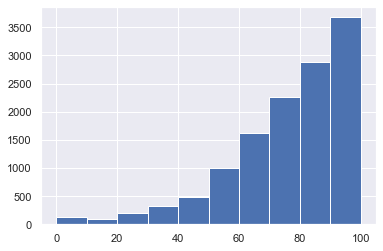

***************************************************************************
             :------------ pct_aca_orig_idf ------------:
***************************************************************************


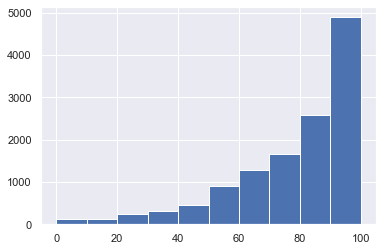

***************************************************************************
             :------------ nb_cla_pc ------------:
***************************************************************************


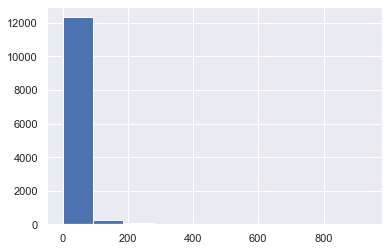

***************************************************************************
             :------------ nb_cla_pp_bp_brs ------------:
***************************************************************************


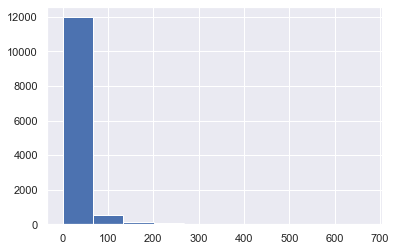

***************************************************************************
             :------------ pct_b ------------:
***************************************************************************


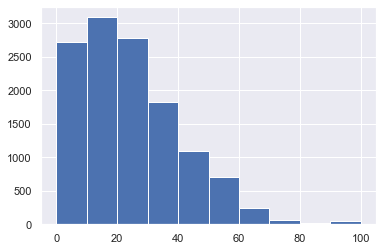

***************************************************************************
             :------------ taux_adm_psup ------------:
***************************************************************************


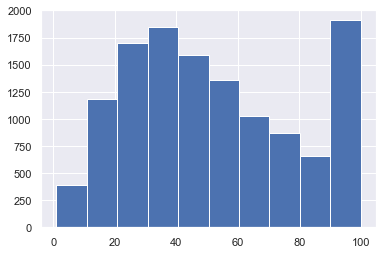

***************************************************************************
             :------------ pct_bt_mention ------------:
***************************************************************************


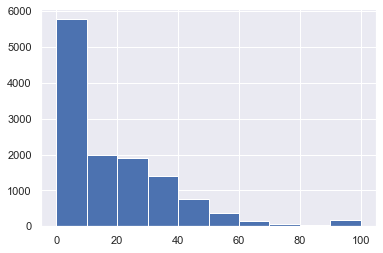

***************************************************************************
             :------------ nb_cla_pp_bt ------------:
***************************************************************************


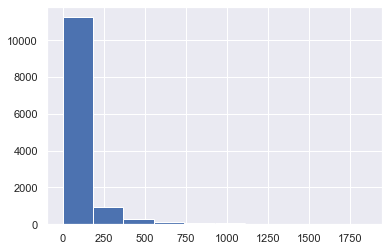

***************************************************************************
             :------------ ran_grp2 ------------:
***************************************************************************


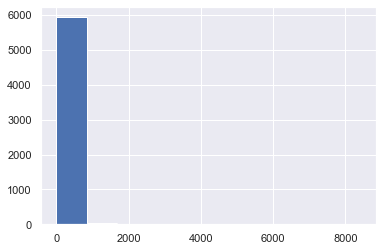

***************************************************************************
             :------------ nb_voe_pc_bg ------------:
***************************************************************************


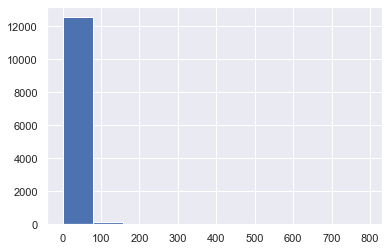

***************************************************************************
             :------------ acc_bp ------------:
***************************************************************************


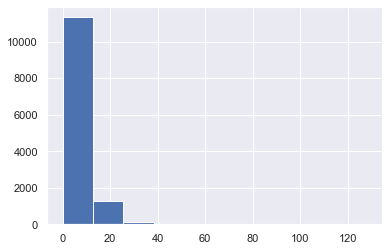

***************************************************************************
             :------------ acc_b ------------:
***************************************************************************


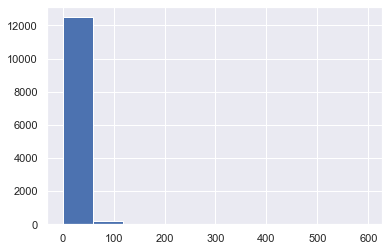

***************************************************************************
             :------------ pct_acc_datebac ------------:
***************************************************************************


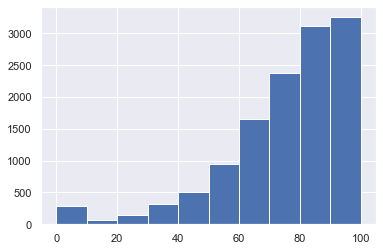

***************************************************************************
             :------------ taux_adm_psup_techno ------------:
***************************************************************************


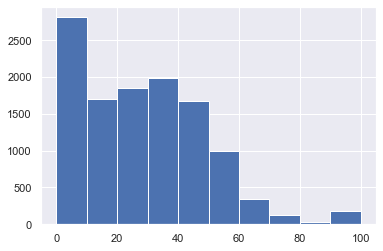

***************************************************************************
             :------------ nb_cla_pp_internat ------------:
***************************************************************************


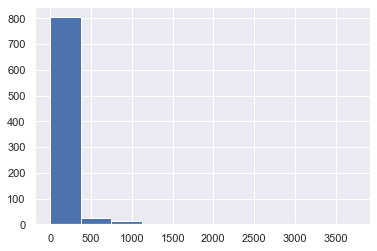

***************************************************************************
             :------------ nb_voe_pp_internat ------------:
***************************************************************************


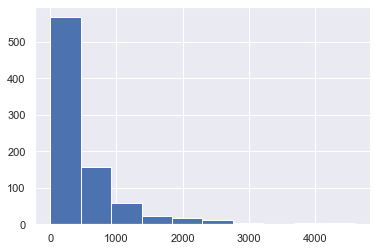

***************************************************************************
             :------------ acc_internat ------------:
***************************************************************************


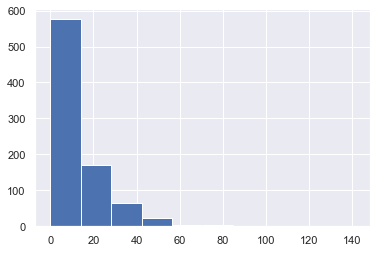

***************************************************************************
             :------------ nb_cla_pp_pasinternat ------------:
***************************************************************************


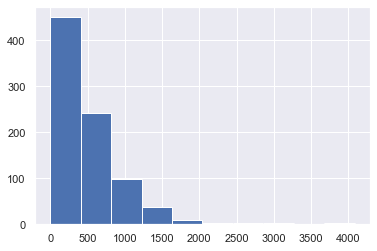

***************************************************************************
             :------------ ran_grp4 ------------:
***************************************************************************


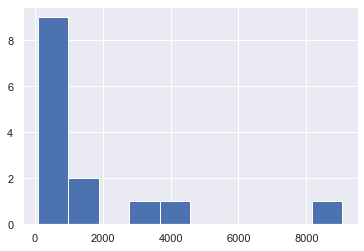

***************************************************************************
             :------------ ran_grp5 ------------:
***************************************************************************


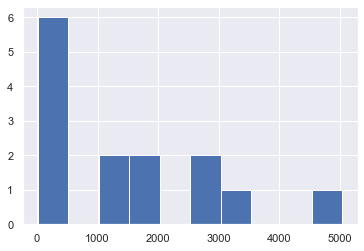

In [27]:
graph(df_n)

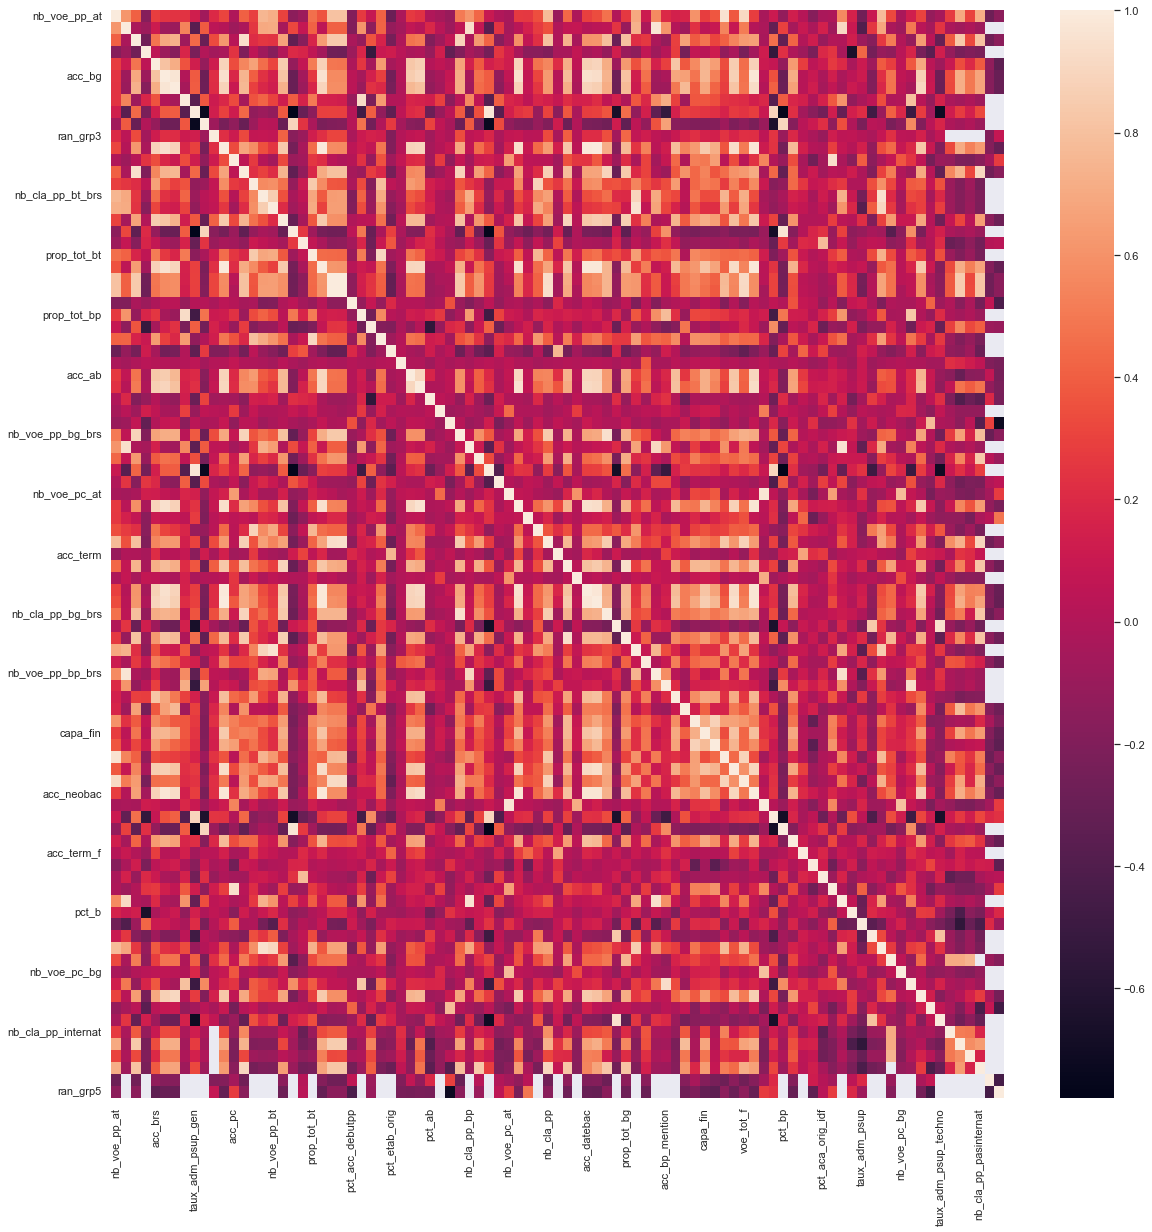

In [28]:
###Corrélation_Matrice
corrMatrix = df_n.corr()
sns.heatmap(corrMatrix, annot=False)
fig = plt.gcf()
fig.set_size_inches(20, 20)
plt.savefig('Matrice_Correlation.png')

In [1]:
#!pip install "pandas-profiling-3.1.0.tar.gz" --user
#!pip uninstall pandas-profiling 

In [2]:
## Statistiques descriptives
#import pandas_profiling as pp



#rapport = pp.ProfileReport(glob_data, title='Statistiques descriptives', explorative=True)
#rapport.to_widgets()
#rapport.to_notebook_iframe()


In [ ]:
pp.ProfileReport()

In [29]:
#!pip install autoviz --user
#!pip install emoji
!pip install dtale --user

  Using cached dtale-1.61.1-py2.py3-none-any.whl (11.4 MB)
  Using cached dash_daq-0.5.0-py3-none-any.whl


  ERROR: Command errored out with exit status 1:
   command: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Asus ZenBook\\AppData\\Local\\Temp\\pip-install-7lh993yb\\lz4_c9962746d2a24642bbec081bee5f6af5\\setup.py'"'"'; __file__='"'"'C:\\Users\\Asus ZenBook\\AppData\\Local\\Temp\\pip-install-7lh993yb\\lz4_c9962746d2a24642bbec081bee5f6af5\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Asus ZenBook\AppData\Local\Temp\pip-wheel-xl6f0_ny'
       cwd: C:\Users\Asus ZenBook\AppData\Local\Temp\pip-install-7lh993yb\lz4_c9962746d2a24642bbec081bee5f6af5\
  Complete output (17 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win

  Using cached lz4-3.1.10.tar.gz (162 kB)
  Using cached flask_ngrok-0.0.25-py3-none-any.whl (3.1 kB)
  Using cached dash_bootstrap_components-1.0.2-py3-none-any.whl (209 kB)
  Using cached kaleido-0.2.1-py2.py3-none-win_amd64.whl (65.9 MB)
  Using cached dash_colorscales-0.0.4-py3-none-any.whl
  Running setup.py clean for lz4
Failed to build lz4
    Running setup.py install for lz4: started
    Running setup.py install for lz4: finished with status 'error'



    creating build\lib.win-amd64-3.9
    creating build\lib.win-amd64-3.9\lz4
    copying lz4\version.py -> build\lib.win-amd64-3.9\lz4
    copying lz4\__init__.py -> build\lib.win-amd64-3.9\lz4
    creating build\lib.win-amd64-3.9\lz4\block
    copying lz4\block\__init__.py -> build\lib.win-amd64-3.9\lz4\block
    creating build\lib.win-amd64-3.9\lz4\frame
    copying lz4\frame\__init__.py -> build\lib.win-amd64-3.9\lz4\frame
    creating build\lib.win-amd64-3.9\lz4\stream
    copying lz4\stream\__init__.py -> build\lib.win-amd64-3.9\lz4\stream
    running build_ext
    building 'lz4._version' extension
    error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
    ----------------------------------------
ERROR: Command errored out with exit status 1: 'C:\ProgramData\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Asus ZenBook\\App

In [ ]:
import dtale
import pandas as pd
d = dtale.show(df)
d.open_browser()

In [31]:
sns.pairplot(df[:10])

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x0000023BE2FE6700> (for post_execute):


KeyboardInterrupt: 

In [ ]:
df.plot(kind=’box’, subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(20, 20), color=’deeppink’)

In [ ]:
mask = np.tril(df1.corr())
sns.heatmap(df1.corr(), fmt=’.1g’, annot = True, cmap= ‘cool’, mask=mask)

In [ ]:
#sns.catplot(data=glob_data[:], kind="swarm", x="contrat_etab", y="acc_tot", hue="select_form")


In [ ]:
!pip install pandas-profiling --user


In [ ]:
### STATISTIQUES

In [ ]:
## Effectif total des candidats pour une formation : voe_tot

In [ ]:
#selon le sexe

df['voe_tot_%_filles'] = 100*df['voe_tot_f']/df['voe_tot']

In [ ]:
df['voe_tot_%_filles'].describe()

In [ ]:
df['g_ea_lib_vx'][df['voe_tot_%_filles'] == 0]

In [ ]:
sns.barplot(x="voe_tot",  y="tri", data=df, ci=None)


In [ ]:
sns.barplot(x="voe_tot_f",  y="tri", data=df, ci=None)

In [ ]:
data = df[['g_ea_lib_vx','voe_tot',  'voe_tot_%_filles']].melt('g_ea_lib_vx', var_name='Type', value_name='effectif')

In [ ]:
li = list(df['voe_tot']) + list(df['voe_tot_f'])

In [ ]:
#create DataFrame
df_p = pd.DataFrame({'Valeurs':list(df['voe_tot']) + list(df['voe_tot_f']),
                     
                   'Tri': list(df['tri'])+ list(df['tri'])
                     ,
                     
                   'Iden':['Total']*len(df)+ ['Filles']*len(df)
                               })

In [ ]:
df_p

In [ ]:
sns.barplot(x="Valeurs",  y="Tri", data=df_p, ci=None, hue = 'Iden')

In [ ]:
df["filles"] = df['voe_tot_f']
df["garcons"] = df['voe_tot'] - df['voe_tot_f']
hom = fem = df[['tri','garcons']].groupby('tri').sum()
fem = df[['tri','filles']].groupby('tri').sum()

In [ ]:
base = pd.concat([hom,fem],axis = 1)
base.reset_index(inplace = True)

In [ ]:
base['garcons'] = 100*base['garcons']/(base['garcons'] + base['filles'])

In [ ]:
base['filles'] =100- base['garcons']

In [ ]:
base_ =base.melt('tri', var_name='Sexe', value_name= "Valeurs")
base_

In [ ]:
plt.subplots(figsize=(12, 5))
sx = sns.barplot(x="Valeurs",  y="tri", data=base_, ci=None, hue = 'Sexe')
x_labels = base_['Valeurs']
sx.set 

### 1.3 INSERTION PROFESSIONNEL



https://data.enseignementsup-recherche.gouv.fr/api/records/1.0/search/?dataset=fr-esr-insertion_professionnelle-lp&q=&rows=1500&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018

In [66]:
insertion = glob_path + "fr-esr-insertion_professionnelle-"
niveau = ["lp", "master"]
complement = "&q=&rows=1500&sort=-annee&facet=annee&facet=diplome&facet=numero_de_l_etablissement&facet=etablissement&facet=academie&facet=domaine&facet=code_de_la_discipline&facet=discipline&facet=situation&facet=cle_etab&facet=cle_disc&facet=id_paysage&refine.annee=2018"

In [67]:
#Récupération selon le niveau
data_insertion = [requests.get(insertion + niveau[x] + complement) for x in range(2)]

In [68]:
#Conversion de json à pd.Dataframe
data_insertion = [pd.json_normalize(x.json()['records'][:]) for x in data_insertion ]

In [69]:
###Les données selon le niveau sont identifiées par la varibale datsetid

In [70]:
data_insertion[0].shape

(1432, 36)

In [71]:
data_insertion[1].shape

(1500, 36)

In [72]:
glob_data_insertion = pd.concat(data_insertion)
glob_data_insertion.columns = [c.replace('fields.', '') for c in list(glob_data_insertion.columns) ]

In [73]:
glob_data_insertion.head()

datasetid  \
0  fr-esr-insertion_professionnelle-lp   
1  fr-esr-insertion_professionnelle-lp   
2  fr-esr-insertion_professionnelle-lp   
3  fr-esr-insertion_professionnelle-lp   
4  fr-esr-insertion_professionnelle-lp   

                                   recordid                  record_timestamp  \
0  da765b6a4d45dd6886a8baeba37997c653f36b41  2021-12-15T22:16:37.978000+00:00   
1  fd7af98d5194b196646e8a56d246429bfb6d3fd3  2021-12-15T22:16:37.978000+00:00   
2  8e0659da8279539be416739ff8bf43a896b75cc4  2021-12-15T22:16:37.978000+00:00   
3  01e6b76cfc0190483488a5e2b810015a62d142d4  2021-12-15T22:16:37.978000+00:00   
4  8e7f79b211b5071c5c9faf34a25cc5e4d51b4bd7  2021-12-15T22:16:37.978000+00:00   

                                          discipline  \
0  Ensemble formations juridiques, économiques et...   
1                                           Économie   
2                                            Gestion   
3                                            Gestion   
4                             Lettres, langues, arts   

  salaire_brut_annuel_estime salaire_net_mensuel_regional_3eme_quartile  \
0                      27000                                       2240   
1                         ns                                       2240   
2                      27900                                       2240   
3                      28200                                       2240   
4                         ns                                       2240   

  salaire_net_mensuel_median_regional   cle_disc taux_de_reponse  \
0                                1860  disc01_18              78   
1                                1860  disc03_18              81   
2                                1860  disc04_18              75   
3                                1860  disc04_30              75   
4                                1860  disc06_18              63   

            etablissementactuel emplois_cadre_ou_professions_intermediaires  \
0  Université Côte d'Azur (UCA)                                          50   
1  Université Côte d'Azur (UCA)                                          ns   
2  Université Côte d'Azur (UCA)                                          56   
3  Université Côte d'Azur (UCA)                                          54   
4  Université Côte d'Azur (UCA)                                          ns   

  taux_dinsertion emplois_exterieurs_a_la_region_de_luniversite  \
0              96                                            34   
1              90                                            ns   
2             100                                            24   
3              98                                            24   
4              ns                                            ns   

  emplois_stables      diplome salaire_net_median_des_emplois_a_temps_plein  \
0              82  LICENCE PRO                                         1730   
1              ns  LICENCE PRO                                           ns   
2              90  LICENCE PRO                                         1790   
3              94  LICENCE PRO                                         1810   
4              ns  LICENCE PRO                                           ns   

  poids_de_la_discipline taux_de_chomage_regional code_du_domaine  \
0                     49                        9             DEG   
1                     16                        9             DEG   
2                     27                        9             DEG   
3                     27                        9             DEG   
4                      1                        9             LLA   

  emplois_a_temps_plein code_de_la_discipline de_diplomes_boursiers academie  \
0                    95                disc01                    14     Nice   
1                    ns                disc03                    14     Nice   
2                    92                disc04                    14     Nice   
3   

# ---------------------------------------------KHARIRATOU---------------------------------------------

In [170]:
df = glob_data_insertion.copy()

In [37]:
import seaborn as sns

In [81]:
import numpy as np

In [91]:
df['na']=np.nan

In [92]:
df['na']

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1495   NaN
1496   NaN
1497   NaN
1498   NaN
1499   NaN
Name: na, Length: 2932, dtype: float64

In [119]:
df[df['taux_dinsertion']=='ns']

datasetid  \
4         fr-esr-insertion_professionnelle-lp   
5         fr-esr-insertion_professionnelle-lp   
8         fr-esr-insertion_professionnelle-lp   
9         fr-esr-insertion_professionnelle-lp   
10        fr-esr-insertion_professionnelle-lp   
...                                       ...   
1493  fr-esr-insertion_professionnelle-master   
1494  fr-esr-insertion_professionnelle-master   
1495  fr-esr-insertion_professionnelle-master   
1496  fr-esr-insertion_professionnelle-master   
1499  fr-esr-insertion_professionnelle-master   

                                      recordid  \
4     8e7f79b211b5071c5c9faf34a25cc5e4d51b4bd7   
5     3b9e4979266933aba7b678358279f13dcb23c78f   
8     7f46dcdcfba1946516d204152904657acd72517b   
9     fb039b7448a68a7ab3fab8859eca3ab91829f3ba   
10    37dd26e18c071adbcbd0172d68059bc7c0545513   
...                                        ...   
1493  1d8957eb097edb531d0ecd3dea8d49147f027c64   
1494  ca32f977959fc3c0ffc902b8125599b61ba87b14   
1495  221e932fd109abf487628201d02e94fbc2ce2845   
1496  140105064e452e76197ab5c5ea2caaef45f6806f   
1499  815e88a39eb9d6b05729572ffc2e0f90276c11f5   

                      record_timestamp                            discipline  \
4     2021-12-15T22:16:37.978000+00:00                Lettres, langues, arts   
5     2021-12-15T22:16:37.978000+00:00             Information communication   
8     2021-12-15T22:16:37.978000+00:00     Sciences de la vie et de la terre   
9     2021-12-15T22:16:37.978000+00:00                Sciences fondamentales   
10    2021-12-15T22:16:37.978000+00:00               Sciences de l'ingénieur   
...                                ...                                   ...   
1493  2021-12-15T22:16:17.552000+00:00  Autres sciences humaines et sociales   
1494  2021-12-15T22:16:17.552000+00:00  Autres sciences humaines et sociales   
1495  2021-12-15T22:16:17.552000+00:00                Sciences fondamentales   
1496  2021-12-15T22:16:17.552000+00:00                          Informatique   
1499  2021-12-15T22:16:17.552000+00:00     Sciences de la vie et de la terre   

     salaire_brut_annuel_estime salaire_net_mensuel_regional_3eme_quartile  \
4                            ns                                       2240   
5                            ns                                       2240   
8                            ns                                       2240   
9                            ns                                       2240   
10                           ns                                       2240   
...                         ...                                        ...   
1493                         ns                                       2700   
1494                         ns                                       2700   
1495                         ns                                       2700   
1496                         ns                                       2700   
1499                         ns                                       2700   

     salaire_net_mensuel_median_regional   cle_disc taux_de_reponse  \
4                                   1860  disc06_18              63   
5                                   1860  disc10_18              67   
8                                   1860  disc13_30              77   
9                                   1860  disc14_18              75   
10                                  1860  disc15_18              90   
...                                  ...        ...             ...   
1493                                2170  disc11_18              58   
1494                                2170  disc11_30              58   
1495                                2170  disc14_30              50   
1496                                2170  disc16_18              61   
1499                                2170  disc13_18              81   

               etablissementactuel  \
4     Université Côte d'Azur (UCA)   
5     Université Cô

In [159]:
df['taux_dinsertion'].replace({'ns': np.nan}, inplace = True)

In [174]:
df[df['taux_dinsertion'] == 'nd'] = np.nan

In [175]:
df[df['taux_dinsertion'] == 'nd']

Empty DataFrame
Columns: [datasetid, recordid, record_timestamp, discipline, salaire_brut_annuel_estime, salaire_net_mensuel_regional_3eme_quartile, salaire_net_mensuel_median_regional, cle_disc, taux_de_reponse, etablissementactuel, emplois_cadre_ou_professions_intermediaires, taux_dinsertion, emplois_exterieurs_a_la_region_de_luniversite, emplois_stables, diplome, salaire_net_median_des_emplois_a_temps_plein, poids_de_la_discipline, taux_de_chomage_regional, code_du_domaine, emplois_a_temps_plein, code_de_la_discipline, de_diplomes_boursiers, academie, numero_de_l_etablissement, domaine, nombre_de_reponses, femmes, salaire_net_mensuel_regional_1er_quartile, cle_etab, emplois_cadre, situation, annee, id_paysage, etablissement, code_de_l_academie, remarque]
Index: []

In [180]:
#création variable nombre de personnes insérées
df["taux_dinsertion"] = df["taux_dinsertion"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_insertion']= df["taux_dinsertion"]*df["nombre_de_reponses"]

In [194]:
df_g.reset_index(inplace = True)

In [197]:
df_g

taux_dinsertion  \
discipline                                                            
Autres formations juridiques, économiques et de...           1818.0   
Autres sciences humaines et sociales                         4594.0   
Autres sciences, technologies et santé                       3588.0   
Droit                                                        6000.0   
Ensemble formations juridiques, économiques et ...          16973.0   
Ensemble sciences humaines et sociales                       9364.0   
Ensemble sciences, technologies et santé                    16145.0   
Gestion                                                     16057.0   
Histoire-géographie                                          1846.0   
Information communication                                    4152.0   
Informatique                                                 8623.0   
Lettres, langues, arts                                       5223.0   
Masters enseignement                                         5941.0   
Psychologie                                                  3501.0   
Sciences de l'ingénieur                                     10118.0   
Sciences de la vie et de la terre                            7073.0   
Sciences fondamentales                                       4096.0   
Économie                                                     3687.0   

                                                    nombre_de_reponses  \
discipline                                                               
Autres formations juridiques, économiques et de...              3578.0   
Autres sciences humaines et sociales                            7837.0   
Autres sciences, technologies et santé                          2435.0   
Droit                                                           9119.0   
Ensemble formations juridiques, économiques et ...             57779.0   
Ensemble sciences humaines et sociales                         21402.0   
Ensemble sciences, technologies et santé                       52667.0   
Gestion                                                        39095.0   
Histoire-géographie                                             3334.0   
Information communication                                       3889.0   
Informatique                                                   11153.0   
Lettres, langues, arts                                          7838.0   
Masters enseignement                                           16880.0   
Psychologie                                                     5404.0   
Sciences de l'ingénieur                                        20245.0   
Sciences de la vie et de la terre                              11781.0   
Sciences fondamentales                                          4808.0   
Économie                                                        4546.0   

                                                    nb_insertion  
discipline                                                        
Autres formations juridiques, économiques et de...      314354.0  
Autres sciences humaines et sociales                    673492.0  
Autres sciences, technologies et santé                  223380.0  
Droit                                                   841744.0  
Ensemble formations juridiques, économiques et ...     5296183.0  
Ensemble sciences humaines et sociales                 1849129.0  
Ensemble sciences, technologies et santé               4864490.0  
Gestion                                                3596048.0  
Histoire-géographie                                     271377.0  
Information communication                               329144.0  
Informatique                                           1054066.0  
Lettres, langues, arts                                  661720.0  
Masters enseignement                                   1603482.0  
Psychologie                                             498685.0  
Sciences de l'ingénieur                                1889011.0  
Sciences de

# Répartition des insérés par discipline et par établissement

<AxesSubplot:xlabel='nb_insertion', ylabel='discipline'>

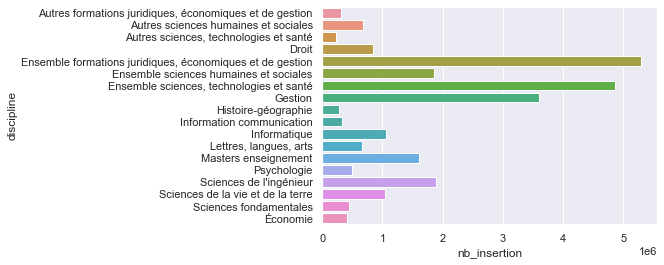

In [199]:
# Répartition du nombre d'insérés par discipline
df_g =df.groupby(['discipline']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_insertion', ylabel='domaine'>

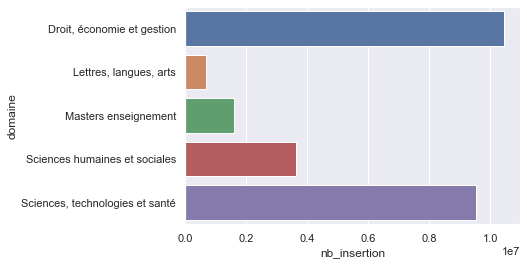

In [201]:
df_g =df.groupby(['domaine']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="domaine", data=df_g)

<AxesSubplot:xlabel='nb_insertion', ylabel='cle_etab'>

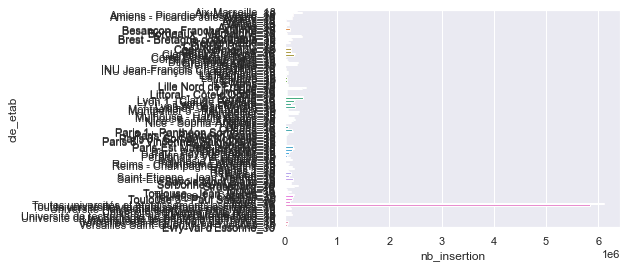

In [202]:
# Répartion du nombre des insérés par établissement
df_g =df.groupby(['cle_etab']).sum('nb_insertion')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_insertion", y="cle_etab", data=df_g)

In [222]:
# Répartion du nombre des insérés par établissement
df_g =df.groupby(['cle_etab']).sum('nb_insertion')
df_g.reset_index(inplace = True)
df_g

cle_etab  taux_dinsertion  \
0                           Aix-Marseille_18           1732.0   
1                           Aix-Marseille_30           2034.0   
2           Amiens - Picardie Jules-Verne_18           1666.0   
3           Amiens - Picardie Jules-Verne_30           1635.0   
4                                  Angers_18           1268.0   
..                                       ...              ...   
137   Université de technologie de Troyes_30              0.0   
138  Versailles Saint-Quentin-en-Yvelines_18            728.0   
139  Versailles Saint-Quentin-en-Yvelines_30            704.0   
140                    Évry-Val d'Essonne_18            546.0   
141                    Évry-Val d'Essonne_30            553.0   

     nombre_de_reponses  femmes  nb_insertion  nb_femmes  
0                2587.0  1006.0      227064.0   138389.0  
1                3756.0  1165.0      333710.0   201404.0  
2                1716.0  1000.0      152522.0    90916.0  
3                1657.0   891.0      152209.0    84645.0  
4                1565.0   783.0      139472.0    90285.0  
..                  ...     ...           ...        ...  
137                20.0     0.0           0.0        0.0  
138               699.0   512.0       60773.0    45316.0  
139               678.0   517.0       57288.0    43844.0  
140               375.0   336.0       34651.0    23446.0  
141               372.0   359.0       34852.0    24112.0  

[142 rows x 6 columns]

In [220]:
#import pandas as pd
#pd.crosstab(df.cle_etab, df.nb_insertion).apply(lambda r: r/len(df), axis=1)

#freq = df.groupby(['cle_etab']).sum('nb_insertion').sort_values
#print(freq)

# Caractéristiques des sortants et caractéristiques des sortants insérés

## Par sexe

In [207]:
#création variable nombre de femmes
df[df['femmes'] == 'ns'] = np.nan
df[df['femmes'] == 'nd'] = np.nan

df["femmes"] = df["femmes"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_femmes']= df["femmes"]*df["nombre_de_reponses"]

<AxesSubplot:xlabel='nb_femmes', ylabel='discipline'>

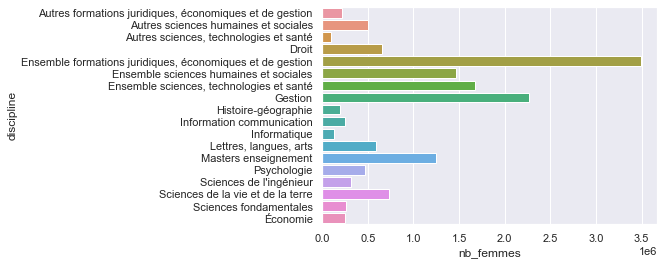

In [208]:
# Répartition du nombre de femmes diplomées par discipline
df_g =df.groupby(['discipline']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_femmes', ylabel='domaine'>

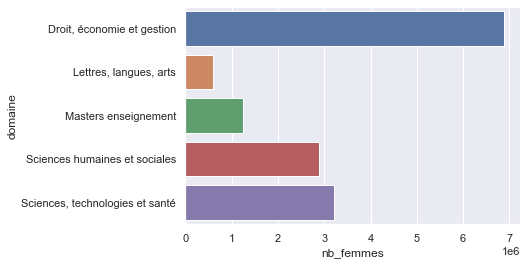

In [209]:
df_g =df.groupby(['domaine']).sum('nb_femmes')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_femmes", y="domaine", data=df_g)

In [226]:
# Représentation Proportion des femmes insérées selon l'établissement???
df['nb_femmes_inserees']= df["nb_femmes"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_femmes_inserees')
#df_g1.reset_index(inplace = True)
df_g1

taux_dinsertion  nombre_de_reponses  \
cle_etab                                                                       
Aix-Marseille_18                                  1732.0              2587.0   
Aix-Marseille_30                                  2034.0              3756.0   
Amiens - Picardie Jules-Verne_18                  1666.0              1716.0   
Amiens - Picardie Jules-Verne_30                  1635.0              1657.0   
Angers_18                                         1268.0              1565.0   
...                                                  ...                 ...   
Université de technologie de Troyes_30               0.0                20.0   
Versailles Saint-Quentin-en-Yvelines_18            728.0               699.0   
Versailles Saint-Quentin-en-Yvelines_30            704.0               678.0   
Évry-Val d'Essonne_18                              546.0               375.0   
Évry-Val d'Essonne_30                              553.0               372.0   

                                         femmes  nb_insertion  nb_femmes  \
cle_etab                                                                   
Aix-Marseille_18                         1006.0      227064.0   138389.0   
Aix-Marseille_30                         1165.0      333710.0   201404.0   
Amiens - Picardie Jules-Verne_18         1000.0      152522.0    90916.0   
Amiens - Picardie Jules-Verne_30          891.0      152209.0    84645.0   
Angers_18                                 783.0      139472.0    90285.0   
...                                         ...           ...        ...   
Université de technologie de Troyes_30      0.0           0.0        0.0   
Versailles Saint-Quentin-en-Yvelines_18   512.0       60773.0    45316.0   
Versailles Saint-Quentin-en-Yvelines_30   517.0       57288.0    43844.0   
Évry-Val d'Essonne_18                     336.0       34651.0    23446.0   
Évry-Val d'Essonne_30                     359.0       34852.0    24112.0   

                                         nb_femmes_inserees  
cle_etab                                                     
Aix-Marseille_18                                  11.778862  
Aix-Marseille_30                                  13.296297  
Amiens - Picardie Jules-Verne_18                  11.577243  
Amiens - Picardie Jules-Verne_30                   9.913666  
Angers_18                                          8.668913  
...                                                     ...  
Université de technologie de Troyes_30             0.000000  
Versailles Saint-Quentin-en-Yvelines_18            5.640502  
Versailles Saint-Quentin-en-Yvelines_30            5.888665  
Évry-Val d'Essonne_18                              3.620585  
Évry-Val d'Essonne_30                              3.824741  

[142 rows x 6 columns]

<AxesSubplot:xlabel='nb_femmes_inserees', ylabel='discipline'>

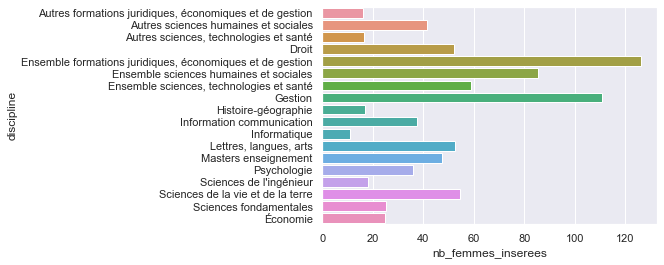

In [232]:
# Répartition proportion de femmes insérées par discipline
df_g2 =df.groupby(['discipline']).sum('nb_femmes_inserees')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_femmes_inserees", y="discipline", data=df_g2)

## Par nombre de boursiers

In [233]:
#création variable nombre de diplomés boursiers
df[df['de_diplomes_boursiers'] == 'ns'] = np.nan
df[df['de_diplomes_boursiers'] == 'nd'] = np.nan

df["de_diplomes_boursiers"] = df["de_diplomes_boursiers"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_de_diplomes_boursiers']= df["de_diplomes_boursiers"]*df["nombre_de_reponses"]

<AxesSubplot:xlabel='nb_de_diplomes_boursiers', ylabel='discipline'>

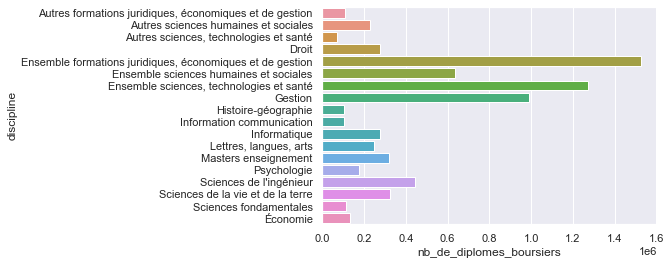

In [234]:
# nb de diplomés boursiers /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_de_diplomes_boursiers', ylabel='domaine'>

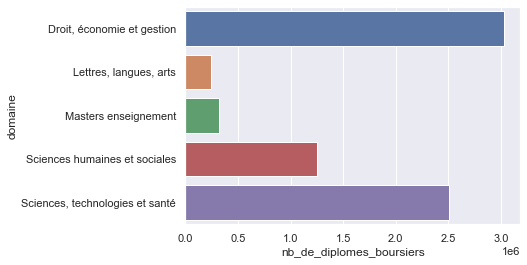

In [235]:
df_g =df.groupby(['domaine']).sum('nb_de_diplomes_boursiers')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_de_diplomes_boursiers", y="domaine", data=df_g)

In [236]:
# Représentation Proportion de boursiers insérés selon l'établissement???
df['nb_boursiers_inseres']= df["nb_de_diplomes_boursiers"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_boursiers_inseres')
#df_g1.reset_index(inplace = True)
df_g1

taux_dinsertion  \
cle_etab                                                   
Aix-Marseille_18                                  1732.0   
Aix-Marseille_30                                  2034.0   
Amiens - Picardie Jules-Verne_18                  1666.0   
Amiens - Picardie Jules-Verne_30                  1635.0   
Angers_18                                         1268.0   
...                                                  ...   
Université de technologie de Troyes_30               0.0   
Versailles Saint-Quentin-en-Yvelines_18            728.0   
Versailles Saint-Quentin-en-Yvelines_30            704.0   
Évry-Val d'Essonne_18                              546.0   
Évry-Val d'Essonne_30                              553.0   

                                         de_diplomes_boursiers  \
cle_etab                                                         
Aix-Marseille_18                                         572.0   
Aix-Marseille_30                                         674.0   
Amiens - Picardie Jules-Verne_18                         517.0   
Amiens - Picardie Jules-Verne_30                         485.0   
Angers_18                                                530.0   
...                                                        ...   
Université de technologie de Troyes_30                     0.0   
Versailles Saint-Quentin-en-Yvelines_18                   46.0   
Versailles Saint-Quentin-en-Yvelines_30                   46.0   
Évry-Val d'Essonne_18                                     60.0   
Évry-Val d'Essonne_30                                     60.0   

                                         nombre_de_reponses  femmes  \
cle_etab                                                              
Aix-Marseille_18                                     2587.0  1006.0   
Aix-Marseille_30                                     3756.0  1165.0   
Amiens - Picardie Jules-Verne_18                     1716.0  1000.0   
Amiens - Picardie Jules-Verne_30                     1657.0   891.0   
Angers_18                                            1565.0   783.0   
...                                                     ...     ...   
Université de technologie de Troyes_30                 20.0     0.0   
Versailles Saint-Quentin-en-Yvelines_18               699.0   512.0   
Versailles Saint-Quentin-en-Yvelines_30               678.0   517.0   
Évry-Val d'Essonne_18                                 375.0   336.0   
Évry-Val d'Essonne_30                                 372.0   359.0   

                                         nb_insertion  nb_femmes  \
cle_etab                                                           
Aix-Marseille_18                             227064.0   138389.0   
Aix-Marseille_30                             333710.0   201404.0   
Amiens - Picardie Jules-Verne_18             152522.0    90916.0   
Amiens - Picardie Jules-Verne_30             152209.0    84645.0   
Angers_18                                    139472.0    90285.0   
...                                               ...        ...   
Université de technologie de Troyes_30            0.0        0.0   
Versailles Saint-Quentin-en-Yvelines_18       60773.0    45316.0   
Versailles Saint-Quentin-en-Yvelines_30       57288.0    43844.0   
Évry-Val d'Essonne_18                         34651.0    23446.0   
Évry-Val d'Essonne_30                         34852.0    24112.0   

                                         nb_femmes_inserees  \
cle_etab                                                      
Aix-Marseille_18                                  11.778862   
Aix-Marseille_30                                  13.296297   
Amiens - Picardie Jules-Verne_18                  11.577243   
Amiens - Picardie Jules-Verne_30                   9.913666   
Angers_18                                          8.668913   
...                                                     ...   
Université de technologie de Troyes_30             0.000000   
Versailles Saint-Quentin-

<AxesSubplot:xlabel='nb_boursiers_inseres', ylabel='discipline'>

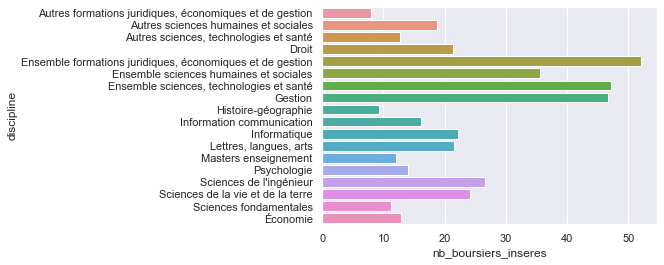

In [237]:
# Répartition proportion de boursiers insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_boursiers_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_boursiers_inseres", y="discipline", data=df_g2)

## Par nombre d'emplois stables

In [238]:
#création variable nombre d'emplois stables
df[df['emplois_stables'] == 'ns'] = np.nan
df[df['emplois_stables'] == 'nd'] = np.nan

df["emplois_stables"] = df["emplois_stables"].astype('float64')
df["nombre_de_reponses"] = df["nombre_de_reponses"].astype('float64')
    
df['nb_emplois_stables']= df["emplois_stables"]*df["nombre_de_reponses"]

<AxesSubplot:xlabel='nb_emplois_stables', ylabel='discipline'>

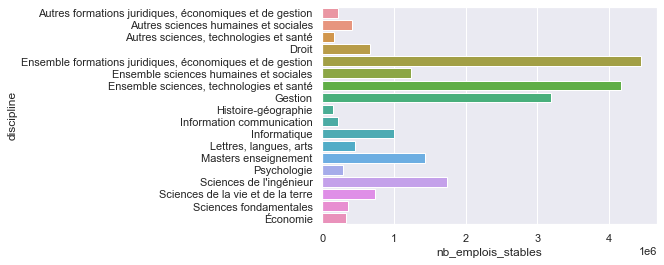

In [239]:
# nb de emplois stables /etab /discipline
df_g =df.groupby(['discipline']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="discipline", data=df_g)

<AxesSubplot:xlabel='nb_emplois_stables', ylabel='domaine'>

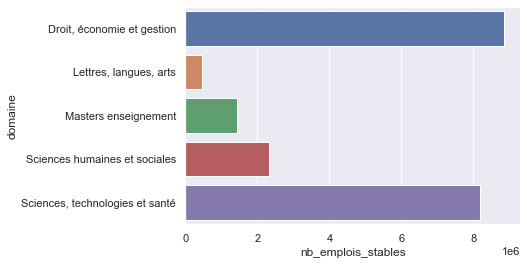

In [240]:
df_g =df.groupby(['domaine']).sum('nb_emplois_stables')
df_g.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables", y="domaine", data=df_g)

In [241]:
# Représentation Proportion de emplois stables des insérés selon l'établissement???
df['nb_emplois_stables_inseres']= df["nb_emplois_stables"]/df["nb_insertion"]
df_g1 =df.groupby(['cle_etab']).sum('nb_emplois_stables_inseres')
#df_g1.reset_index(inplace = True)
df_g1

taux_dinsertion  emplois_stables  \
cle_etab                                                                    
Aix-Marseille_18                                  1484.0           1208.0   
Aix-Marseille_30                                  2034.0           1838.0   
Amiens - Picardie Jules-Verne_18                  1419.0           1157.0   
Amiens - Picardie Jules-Verne_30                  1467.0           1401.0   
Angers_18                                         1183.0            819.0   
...                                                  ...              ...   
Université de technologie de Troyes_30               0.0              0.0   
Versailles Saint-Quentin-en-Yvelines_18            641.0            502.0   
Versailles Saint-Quentin-en-Yvelines_30            623.0            574.0   
Évry-Val d'Essonne_18                              463.0            396.0   
Évry-Val d'Essonne_30                              470.0            442.0   

                                         de_diplomes_boursiers  \
cle_etab                                                         
Aix-Marseille_18                                         494.0   
Aix-Marseille_30                                         674.0   
Amiens - Picardie Jules-Verne_18                         443.0   
Amiens - Picardie Jules-Verne_30                         432.0   
Angers_18                                                503.0   
...                                                        ...   
Université de technologie de Troyes_30                     0.0   
Versailles Saint-Quentin-en-Yvelines_18                   38.0   
Versailles Saint-Quentin-en-Yvelines_30                   38.0   
Évry-Val d'Essonne_18                                     54.0   
Évry-Val d'Essonne_30                                     54.0   

                                         nombre_de_reponses  femmes  \
cle_etab                                                              
Aix-Marseille_18                                     2480.0   874.0   
Aix-Marseille_30                                     3756.0  1165.0   
Amiens - Picardie Jules-Verne_18                     1616.0   824.0   
Amiens - Picardie Jules-Verne_30                     1588.0   753.0   
Angers_18                                            1531.0   723.0   
...                                                     ...     ...   
Université de technologie de Troyes_30                 20.0     0.0   
Versailles Saint-Quentin-en-Yvelines_18               667.0   466.0   
Versailles Saint-Quentin-en-Yvelines_30               646.0   471.0   
Évry-Val d'Essonne_18                                 341.0   332.0   
Évry-Val d'Essonne_30                                 338.0   355.0   

                                         nb_insertion  nb_femmes  \
cle_etab                                                           
Aix-Marseille_18                             218297.0   133696.0   
Aix-Marseille_30                             333710.0   201404.0   
Amiens - Picardie Jules-Verne_18             144294.0    84978.0   
Amiens - Picardie Jules-Verne_30             146414.0    79885.0   
Angers_18                                    136582.0    88245.0   
...                                               ...        ...   
Université de technologie de Troyes_30            0.0        0.0   
Versailles Saint-Quentin-en-Yvelines_18       57989.0    43844.0   
Versailles Saint-Quentin-en-Yvelines_30       54696.0    42372.0   
Évry-Val d'Essonne_18                         31829.0    23310.0   
Évry-Val d'Essonne_30                         32030.0    23976.0   

                                         nb_femmes_inserees  \
cle_etab                                                      
Aix-Marseille_18                                  10.176336   
Aix-Marseille_30                                  13.296297   
Amiens - Picardie Jules-Verne_18                   9.431396   
Amiens - Picardie Jules-Verne_30                   8.270

<AxesSubplot:xlabel='nb_emplois_stables_inseres', ylabel='discipline'>

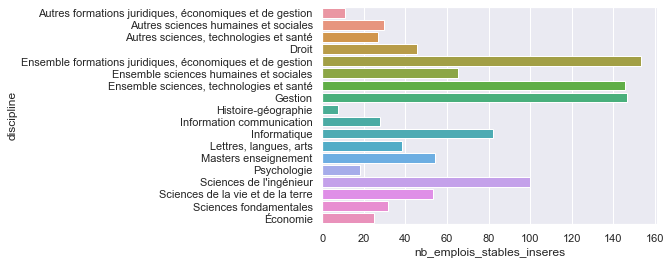

In [242]:
# Répartition proportion de emplois stables des insérés par discipline
df_g2 =df.groupby(['discipline']).sum('nb_emplois_stables_inseres')
df_g2.reset_index(inplace = True)
sns.barplot(x="nb_emplois_stables_inseres", y="discipline", data=df_g2)

## Selon le salaire

In [243]:
#création variable salaires bruts annuels estimés
df[df['salaire_brut_annuel_estime'] == 'ns'] = np.nan
df[df['salaire_brut_annuel_estime'] == 'nd'] = np.nan

df["salaire_brut_annuel_estime"] = df["salaire_brut_annuel_estime"].astype('float64')

<AxesSubplot:xlabel='salaire_brut_annuel_estime', ylabel='discipline'>

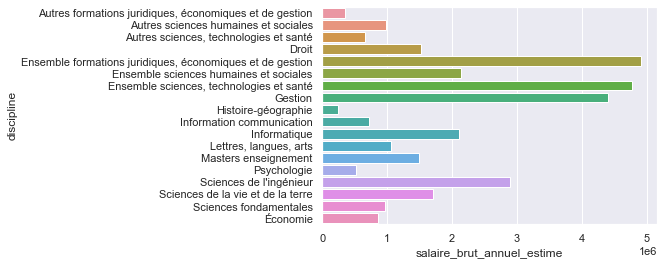

In [244]:
# Répartition des salaires bruts annuels /discipline
df_g =df.groupby(['discipline']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="discipline", data=df_g)

<AxesSubplot:xlabel='salaire_brut_annuel_estime', ylabel='domaine'>

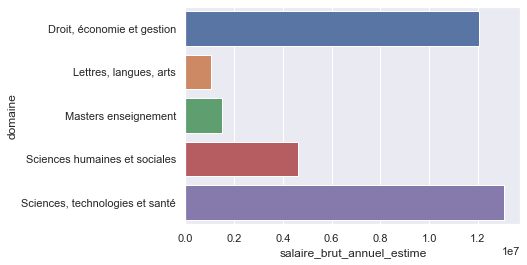

In [245]:
df_g =df.groupby(['domaine']).sum('salaire_brut_annuel_estime')
df_g.reset_index(inplace = True)
sns.barplot(x="salaire_brut_annuel_estime", y="domaine", data=df_g)

In [246]:
# Représentation de salaires bruts annuels selon l'établissement???
df_g1 =df.groupby(['cle_etab']).sum('salaire_brut_annuel_estime')
#df_g1.reset_index(inplace = True)
df_g1

salaire_brut_annuel_estime  \
cle_etab                                                              
Aix-Marseille_18                                           449500.0   
Aix-Marseille_30                                           623400.0   
Amiens - Picardie Jules-Verne_18                           392100.0   
Amiens - Picardie Jules-Verne_30                           426300.0   
Angers_18                                                  250300.0   
...                                                             ...   
Université de technologie de Troyes_30                          0.0   
Versailles Saint-Quentin-en-Yvelines_18                    160500.0   
Versailles Saint-Quentin-en-Yvelines_30                    188900.0   
Évry-Val d'Essonne_18                                      115000.0   
Évry-Val d'Essonne_30                                      118400.0   

                                         taux_dinsertion  emplois_stables  \
cle_etab                                                                    
Aix-Marseille_18                                  1400.0           1126.0   
Aix-Marseille_30                                  1860.0           1703.0   
Amiens - Picardie Jules-Verne_18                  1227.0           1012.0   
Amiens - Picardie Jules-Verne_30                  1280.0           1230.0   
Angers_18                                          913.0            651.0   
...                                                  ...              ...   
Université de technologie de Troyes_30               0.0              0.0   
Versailles Saint-Quentin-en-Yvelines_18            447.0            342.0   
Versailles Saint-Quentin-en-Yvelines_30            533.0            506.0   
Évry-Val d'Essonne_18                              376.0            318.0   
Évry-Val d'Essonne_30                              381.0            360.0   

                                         de_diplomes_boursiers  \
cle_etab                                                         
Aix-Marseille_18                                         472.0   
Aix-Marseille_30                                         618.0   
Amiens - Picardie Jules-Verne_18                         379.0   
Amiens - Picardie Jules-Verne_30                         379.0   
Angers_18                                                380.0   
...                                                        ...   
Université de technologie de Troyes_30                     0.0   
Versailles Saint-Quentin-en-Yvelines_18                   34.0   
Versailles Saint-Quentin-en-Yvelines_30                   36.0   
Évry-Val d'Essonne_18                                     36.0   
Évry-Val d'Essonne_30                                     36.0   

                                         nombre_de_reponses  femmes  \
cle_etab                                                              
Aix-Marseille_18                                     2429.0   819.0   
Aix-Marseille_30                                     3679.0  1045.0   
Amiens - Picardie Jules-Verne_18                     1544.0   686.0   
Amiens - Picardie Jules-Verne_30                     1520.0   634.0   
Angers_18                                            1419.0   527.0   
...                                                     ...     ...   
Université de technologie de Troyes_30                 20.0     0.0   
Versailles Saint-Quentin-en-Yvelines_18               591.0   322.0   
Versailles Saint-Quentin-en-Yvelines_30               604.0   434.0   
Évry-Val d'Essonne_18                                 302.0   278.0   
Évry-Val d'Essonne_30                                 302.0   278.0   

                                         nb_insertion  nb_femmes  \
cle_etab                                                           
Aix-Marseille_18                             214013.0   130891.0   
Aix-Marseille_30                             327011.0   196826.0   
Amiens - Picardie Jules-Verne_18             137384.0    799

# BAMOUNI

## Caractéristique des établissements

#### types des étblissements

Text(0.5, 1.0, ' types des étblissements')

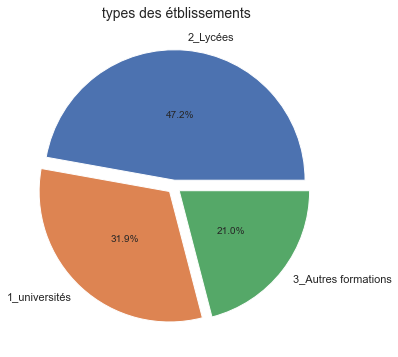

In [392]:
# types des étblissements
pie, ax = plt.subplots(figsize=[8,6])
plt.pie(x= glob_data['tri'].value_counts(), 
        autopct="%.1f%%", explode=[0.05]*3, 
        labels=list(glob_data['tri'].unique()), 
        pctdistance=0.5)
plt.title(" types des étblissements", fontsize=14)

#### Statuts des étblissements

Text(0.5, 1.0, ' Statuts des étblissements')

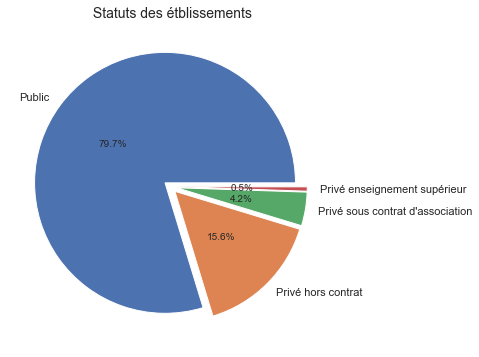

In [393]:
# Statuts des étblissements

pie, ax = plt.subplots(figsize=[8,6])
plt.pie(x= glob_data['contrat_etab'].value_counts(), 
        autopct="%.1f%%", explode=[0.05]*len(glob_data['contrat_etab'].value_counts()), 
        labels=list(glob_data['contrat_etab'].unique()), 
        pctdistance=0.5)
plt.title(" Statuts des étblissements", fontsize=14)

Les établissements demandés par les néo-bacheliers et étudiants en réorientation ou reprise sont pour la plupart publics. En effet, près de 80% de ses établissements ont le status public. Ils sont suivis par les établissements avec le status "Privé sous contrat d'association" (15,6%). Les autres établissements sont en faible proportion avec respectivement 4,16% et 0,53% pour les status "Privé enseignement supérieur" et "Privé hors contrat"

##### Selectivité de la formation

Text(0.5, 1.0, ' Selectivité de la formation')

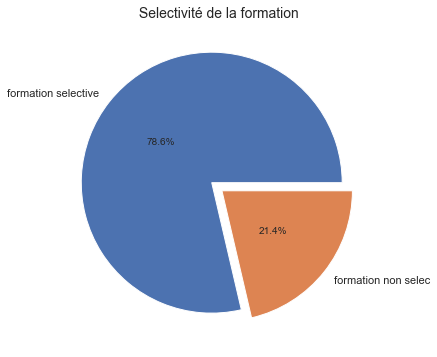

In [394]:
#Selectivité de la formation
pie, ax = plt.subplots(figsize=[8,6])
plt.pie(x= glob_data['select_form'].value_counts(), 
        autopct="%.1f%%", explode=[0.05]*len(glob_data['select_form'].value_counts()), 
        labels=list(glob_data['select_form'].unique()), 
        pctdistance=0.5)
plt.title(" Selectivité de la formation", fontsize=14)

sele

#### Sélectivité des établissements selon leur type

In [437]:
sele_tri = glob_data[['select_form','tri']].pivot_table(index='tri',
                                                  columns='select_form', 
                                                  aggfunc=len,margins=True,
                                                  margins_name="Total")
sele_tri.reset_index(inplace=True)

for col in ["formation non selec","formation selective"] :
    sele_tri[col] = 100*sele_tri[col]/sele_tri['Total']

In [438]:
sele_tri

select_form                  tri  formation non selec  formation selective  \
0                  1_universités            67.019183            32.980817   
1                       2_Lycées                  NaN           100.000000   
2            3_Autres formations                  NaN           100.000000   
3                          Total            21.355799            78.644201   

select_form  Total  
0             4066  
1             6020  
2             2674  
3            12760

In [435]:
sele_tri = pd.melt(sele_tri,id_vars="tri", 
                   value_vars=['formation non selec','formation selective'], 
                   var_name ='selectivite',value_name = "effectif")

In [436]:
sele_tri

tri          selectivite    effectif
0        1_universités  formation non selec   67.019183
1             2_Lycées  formation non selec         NaN
2  3_Autres formations  formation non selec         NaN
3                Total  formation non selec   21.355799
4        1_universités  formation selective   32.980817
5             2_Lycées  formation selective  100.000000
6  3_Autres formations  formation selective  100.000000
7                Total  formation selective   78.644201

<AxesSubplot:xlabel='tri', ylabel='effectif'>

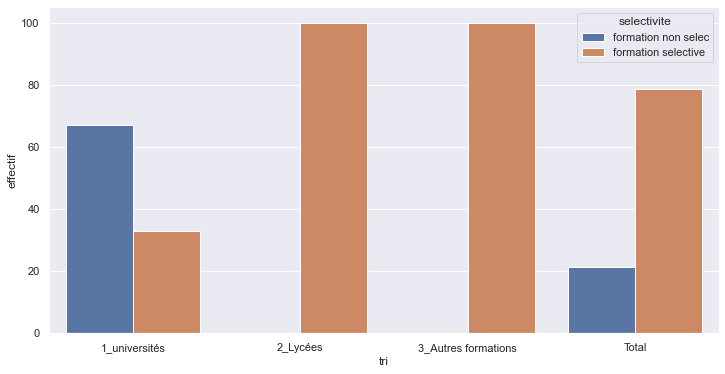

In [431]:
plt.figure(figsize=(12,6))
sns.barplot(x=sele_tri["tri"],y=sele_tri["effectif"],hue = sele_tri["selectivite"])

In [329]:
contr_tri = glob_data[['contrat_etab','tri']].pivot_table(index='tri',
                                                   columns='contrat_etab',
                                                   aggfunc=len,margins=True,
                                                   margins_name="Total")
contr_tri

contrat_etab         Privé enseignement supérieur  Privé hors contrat  \
tri                                                                     
1_universités                                 182                   1   
2_Lycées                                       27                  30   
3_Autres formations                           322                  37   
Total                                         531                  68   

contrat_etab         Privé sous contrat d'association  Public  Total  
tri                                                                   
1_universités                                       2    3881   4066  
2_Lycées                                         1396    4567   6020  
3_Autres formations                               592    1723   2674  
Total                                            1990   10171  12760

###### Filière de formation très agrégée

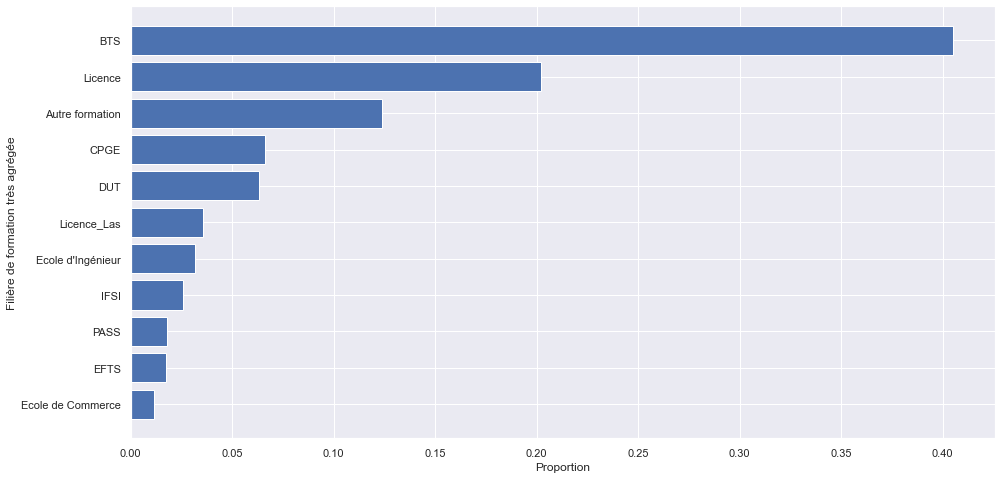

In [432]:
# Filière de formation très agrégée

fig = plt.figure(figsize=(12,6))
ax = fig.add_axes([0,0,1,1])
ax.barh(list(glob_data['fili'].value_counts(ascending=True, normalize=True).index),
        glob_data['fili'].value_counts(ascending=True, normalize=True))
plt.xlabel("Proportion")
plt.ylabel("Filière de formation très agrégée")
plt.legend
plt.show()

# III - Modélisation
## III-1 Prétraitement

In [119]:
df1 = glob_data.copy()
df1['cod_uai'].sample(3)

2486    0330207W
1188    0511556P
5593    0801272Y
Name: cod_uai, dtype: object

In [120]:
df2 = glob_data_insertion.copy()
df2['numero_de_l_etablissement'].sample(3)

1077    0931238R
913     0342321N
305     0211237F
Name: numero_de_l_etablissement, dtype: object

In [121]:
df1.rename(columns = {'cod_uai':'id'}, inplace = True)
df2.rename(columns = {'numero_de_l_etablissement':'id'}, inplace = True)

In [138]:
print(df1['id'].sample(2),df1.shape)
print(df2['id'].sample(2),df2.shape)

1875    0261372A
2183    0620256S
Name: id, dtype: object (12760, 120)
1440    0811293R
1170    0301687W
Name: id, dtype: object (2932, 36)


In [204]:
df2.diplome.unique()

array(['LICENCE PRO', 'MASTER ENS', 'MASTER LMD'], dtype=object)

In [186]:
df1.fili.unique()

array(['BTS', 'CPGE', 'Licence', 'DUT', 'PASS', 'Licence_Las', 'IFSI',
       "Ecole d'Ingénieur", 'EFTS', 'Autre formation',
       'Ecole de Commerce'], dtype=object)

In [125]:
df = df2.merge(df1, on = 'id', how = 'left')

In [126]:
df.shape

(110341, 155)

In [127]:
df

datasetid_x  \
0           fr-esr-insertion_professionnelle-lp   
1           fr-esr-insertion_professionnelle-lp   
2           fr-esr-insertion_professionnelle-lp   
3           fr-esr-insertion_professionnelle-lp   
4           fr-esr-insertion_professionnelle-lp   
...                                         ...   
110336  fr-esr-insertion_professionnelle-master   
110337  fr-esr-insertion_professionnelle-master   
110338  fr-esr-insertion_professionnelle-master   
110339  fr-esr-insertion_professionnelle-master   
110340  fr-esr-insertion_professionnelle-master   

                                      recordid_x  \
0       da765b6a4d45dd6886a8baeba37997c653f36b41   
1       da765b6a4d45dd6886a8baeba37997c653f36b41   
2       da765b6a4d45dd6886a8baeba37997c653f36b41   
3       da765b6a4d45dd6886a8baeba37997c653f36b41   
4       da765b6a4d45dd6886a8baeba37997c653f36b41   
...                                          ...   
110336  666dd6bb853f99299882b215c7591b6d4109cfea   
110337  815e88a39eb9d6b05729572ffc2e0f90276c11f5   
110338  96cc5ec282ad3be66a7821159910343d03fcf3d7   
110339  989374706f54b4db375eb2edd57fc05785c7ad44   
110340  a3060b993f77a01e90f46ef34c9a486a199aa973   

                      record_timestamp_x  \
0       2021-12-15T22:16:37.978000+00:00   
1       2021-12-15T22:16:37.978000+00:00   
2       2021-12-15T22:16:37.978000+00:00   
3       2021-12-15T22:16:37.978000+00:00   
4       2021-12-15T22:16:37.978000+00:00   
...                                  ...   
110336  2021-12-15T22:16:17.552000+00:00   
110337  2021-12-15T22:16:17.552000+00:00   
110338  2021-12-15T22:16:17.552000+00:00   
110339  2021-12-15T22:16:17.552000+00:00   
110340  2021-12-15T22:16:17.552000+00:00   

                                               discipline  \
0       Ensemble formations juridiques, économiques et...   
1       Ensemble formations juridiques, économiques et...   
2       Ensemble formations juridiques, économiques et...   
3       Ensemble formations juridiques, économiques et...   
4       Ensemble formations juridiques, économiques et...   
...                                                   ...   
110336             Ensemble sciences humaines et sociales   
110337                  Sciences de la vie et de la terre   
110338                  Sciences de la vie et de la terre   
110339                             Sciences fondamentales   
110340                            Sciences de l'ingénieur   

       salaire_brut_annuel_estime salaire_net_mensuel_regional_3eme_quartile  \
0                           27000                                       2240   
1                           27000                                       2240   
2                           27000                                       2240   
3                           27000                                       2240   
4                           27000                                       2240   
...                           ...                                        ...   
110336                      32800                                       2700   
110337                         ns                                       2700   
110338                         ns                                       2700   
110339                         ns                                       2700   
110340                         ns                                       2700   

       salaire_net_mensuel_median_regional   cle_disc taux_de_reponse  \
0                                     1860  disc01_18              78   
1                                     1860  disc01_18              78   
2                                     1860  disc01_18              78   
3                                     1860  disc01_18              78   
4                                     1860  disc01_18              78   
...                                    ...        ...             ...   
110336                                2170  disc07_30           

<AxesSubplot:>

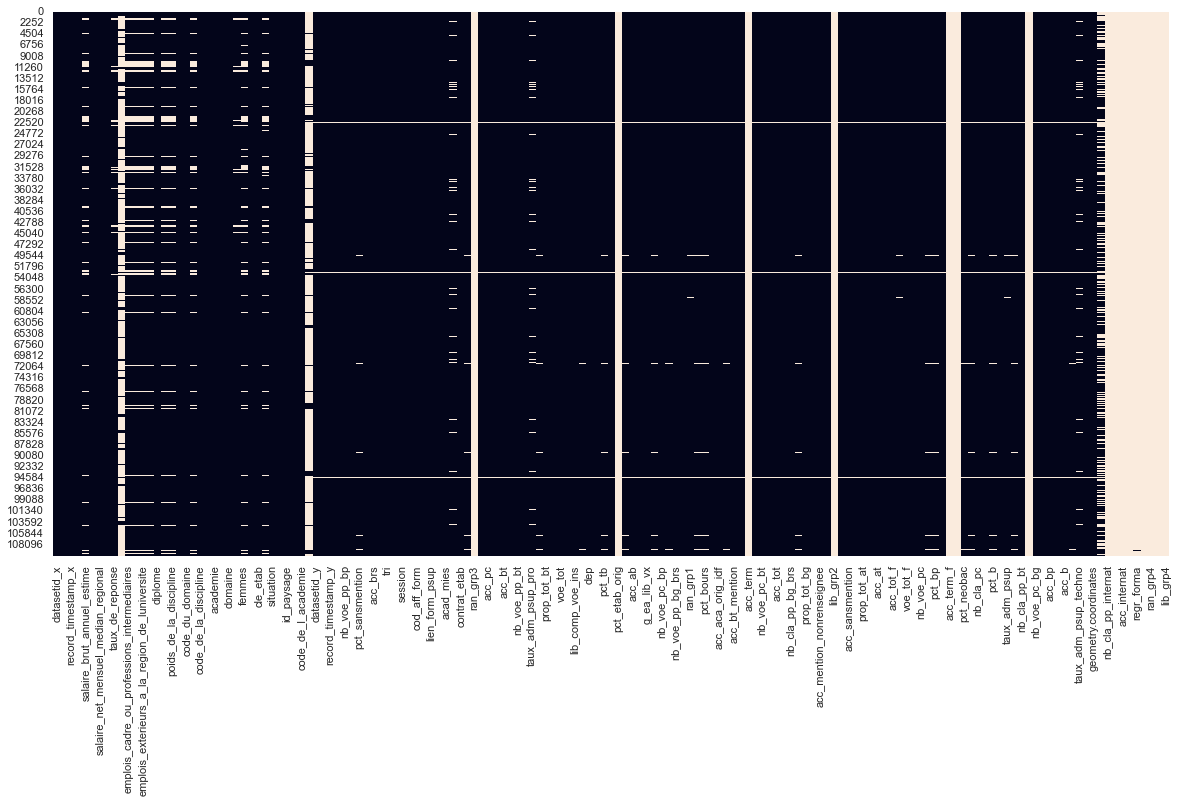

In [128]:
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_row', None)


plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

In [247]:
# Taux de valeurs manquantes par variable
taux_nan = df.isna().sum()/df.shape[0]

# Affichage des taux de valeurs manquantes par variable
taux_nan.sort_values(ascending=True)

datasetid                                        0.000000
etablissement                                    0.000000
annee                                            0.000000
situation                                        0.000000
cle_etab                                         0.000000
salaire_net_mensuel_regional_1er_quartile        0.000000
domaine                                          0.000000
id                                               0.000000
de_diplomes_boursiers                            0.000000
code_de_la_discipline                            0.000000
code_du_domaine                                  0.000000
diplome                                          0.000000
taux_de_chomage_regional                         0.000000
salaire_net_mensuel_median_regional              0.000000
recordid                                         0.000000
record_timestamp                                 0.000000
discipline                                       0.000000
salaire_net_me

In [131]:
# Récupération des variables ayant un taux de valeurs manquantes inférieur à 50%
df_ess = df[df.columns[taux_nan <0.5]]
print(df_ess.shape)

(110341, 137)


In [134]:
df_ess.isna().sum(axis=0)
df_ess = df_ess.dropna()

(12760, 120)


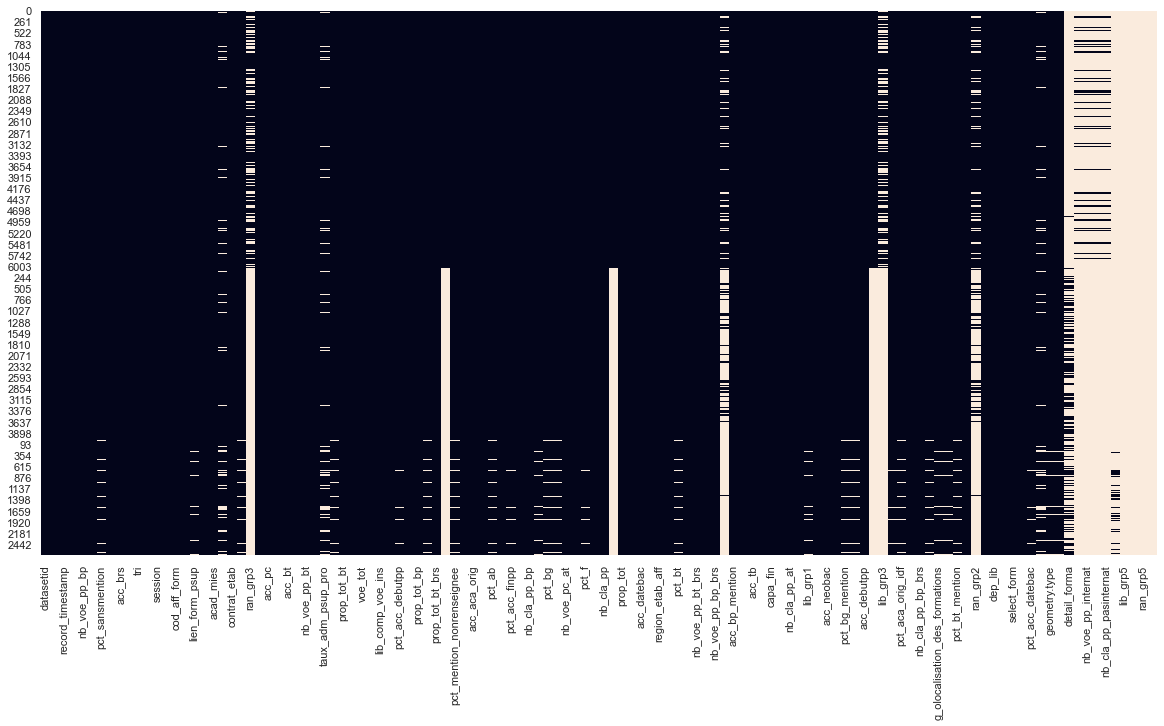

In [140]:

plt.figure(figsize=(20,10))
sns.heatmap(df1.isna(), cbar=False)
print(df1.shape)

(2932, 36)


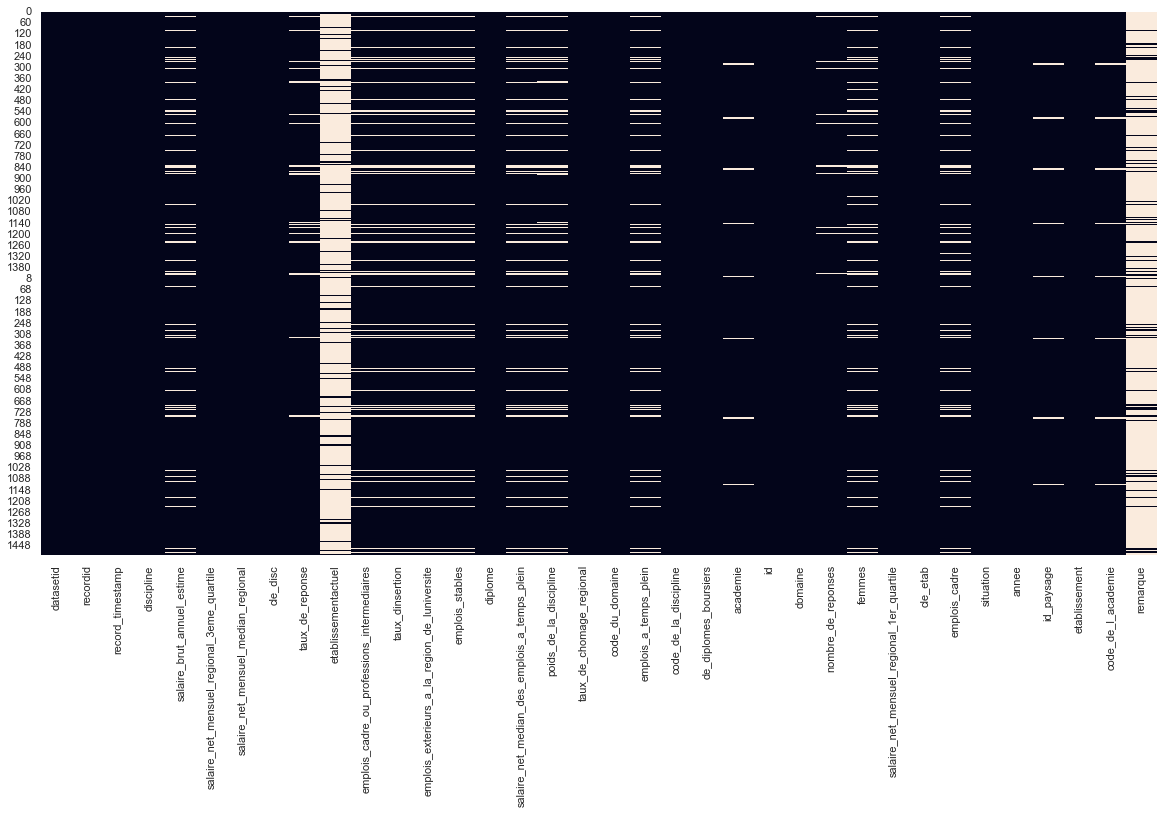

In [141]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.isna(), cbar=False)
print(df2.shape)

In [142]:
df = df_ess.copy()

In [159]:
df.drop_duplicates

KeyboardInterrupt: 

In [ ]:
df.shape

### Construction de la colonne target

In [147]:
# Effectif total des candidats classés par l_établissement en phase principale
#df['nb_cla_pp'].plot.hist(bins = 100)

# Effectif total des candidatspour une formation
df['voe_tot'].value_counts

<bound method IndexOpsMixin.value_counts of 0            45.0
1           190.0
2          3574.0
11          144.0
12          658.0
13          642.0
14          383.0
15          270.0
21         2412.0
22          700.0
24          519.0
26          928.0
27          973.0
28          973.0
33         1242.0
37          364.0
38          294.0
39          238.0
40          828.0
41           92.0
44         1740.0
46          299.0
47          251.0
49          712.0
51         2809.0
52          132.0
53          401.0
54          215.0
57          135.0
61           45.0
62          190.0
63         3574.0
72          144.0
73          658.0
74          642.0
75          383.0
76          270.0
82         2412.0
83          700.0
85          519.0
87          928.0
88          973.0
89          973.0
94         1242.0
98          364.0
99          294.0
100         238.0
101         828.0
102          92.0
105        1740.0
107         299.0
108         251.0
110         712.0
11

In [148]:
from sklearn.preprocessing import KBinsDiscretizer

kmeans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
X = df['voe_tot']
X = X.array.reshape(-1, 1)
df['voeux_class'] = kmeans.fit_transform(X).astype(int)

In [149]:
 df.groupby('voeux_class')['voe_tot'].describe()

count         mean          std     min     25%     50%  \
voeux_class                                                              
0            48528.0   405.888497   315.517137    21.0   158.0   297.0   
1             8933.0  2166.660025   787.496022  1300.0  1533.0  1895.0   
2             1270.0  6565.855118  1919.930811  4618.0  5158.0  5899.0   

                75%      max  
voeux_class                   
0             605.0   1284.0  
1            2695.0   4229.0  
2            7715.0  13213.0

In [439]:
df.head(2)

discipline  \
0  Ensemble formations juridiques, économiques et...   
1  Ensemble formations juridiques, économiques et...   

  salaire_brut_annuel_estime salaire_net_mensuel_median_regional  \
0                      27000                                1860   
1                      27000                                1860   

  emplois_cadre_ou_professions_intermediaires taux_dinsertion emplois_stables  \
0                                          50              96              82   
1                                          50              96              82   

       diplome taux_de_chomage_regional emplois_a_temps_plein  \
0  LICENCE PRO                        9                    95   
1  LICENCE PRO                        9                    95   

  de_diplomes_boursiers academie        id                     domaine  \
0                    14     Nice  0060931E  Droit, économie et gestion   
1                    14     Nice  0060931E  Droit, économie et gestion   

  nombre_de_reponses femmes                    cle_etab emplois_cadre  \
0                 91     60  Nice - Sophia-Antipolis_18             7   
1                 91     60  Nice - Sophia-Antipolis_18             7   

             etablissement code_de_l_academie  \
0  Nice - Sophia-Antipolis                A23   
1  Nice - Sophia-Antipolis                A23   

                                 recordid_y                record_timestamp_y  \
0  d98b36d5cd0323b1d4c86f9a93820d7f88958ed1  2021-02-04T13:10:28.998000+00:00   
1  00c3a7b4cc47665abc99a769e0272e6ebc8932b9  2021-02-04T13:10:28.998000+00:00   

   nb_voe_pp_at  nb_voe_pp_bp  nb_voe_pp_bg  pct_sansmention  \
0           3.0           0.0          28.0             20.0   
1          27.0           3.0          59.0              0.0   

                                     fil_lib_voe_acc  acc_brs  acc_bg  \
0  Langues, littératures & civilisations étrangèr...      0.0     5.0   
1     Sciences de l'Homme, Anthropologie, Ethnologie      3.0     5.0   

             tri  acc_bg_mention                         form_lib_voe_acc  \
0  1_universités             4.0           Licence - Arts-lettres-langues   
1  1_universités             5.0  Licence - Sciences humaines et sociales   

      fili  prop_tot_bp_brs acad_mies  taux_adm_psup_gen contrat_etab  \
0  Licence              0.0      Nice              100.0       Public   
1  Licence              1.0      Nice               87.0       Public   

   pct_bp_mention  acc_finpp  acc_pc  nb_cla_pp_bg  acc_bt  nb_cla_pp_bt_brs  \
0             0.0        6.0     3.0          26.0     0.0               0.0   
1             0.0        9.0    12.0          24.0     0.0               1.0   

   nb_voe_pp_bt  prop_tot_bg_brs  taux_adm_psup_pro  pct_aca_orig  \
0           0.0              3.0                0.0          60.0   
1           5.0              5.0                7.0          40.0   

   prop_tot_bt  acc_pp  voe_tot  nb_voe_pp  \
0          0.0     5.0     45.0       31.0   
1          3.0     3.0    190.0       94.0   

                                    lib_comp_voe_ins  pct_acc_debutpp dep  \
0  Université Côte d'Azur - Licence - Double dipl...            62.50  06   
1  Université Côte d'Azur - Double licence - Scie...            13.33  06   

   prop_tot_bp  pct_tb  prop_tot_bt_brs  pct_mention_nonrenseignee  acc_ab  \
0          0.0    20.0              0.0                        0.0     1.0   
1          1.0    40.0              2.0                        0.0     2.0   

   acc_aca_orig             g_ea_lib_vx  pct_ab  nb_voe_pc_bp  pct_acc_finpp  \
0           3.0  Université Côte d'Azur    20.0           1.0           75.0   
1           2.0  Université Côte d'Azur    40.0           4.0           60.0   

   nb_voe_pp_bg_brs  nb_cla_pp_bp  ran_grp1  pct_bg  pct_bours  nb_voe_pc_at  \
0               3.0           0.0      28.0   100.0        0.0          11.0   
1               8.0           1.0      44.0   100.0       60.0          

In [453]:
pip install git+https://github.com/MaxHalford/Prince

  Cloning https://github.com/MaxHalford/Prince to c:\users\asus zenbook\appdata\local\temp\pip-req-build-xt2fhow4
  Resolved https://github.com/MaxHalford/Prince to commit bd5b29fafe853579c9d41e954caa4504d585665dNote: you may need to restart the kernel to use updated packages.


  Running command git clone -q https://github.com/MaxHalford/Prince 'C:\Users\Asus ZenBook\AppData\Local\Temp\pip-req-build-xt2fhow4'


In [457]:
import prince

In [459]:
X.head()

discipline  \
0   Ensemble formations juridiques, économiques et...   
1   Ensemble formations juridiques, économiques et...   
2   Ensemble formations juridiques, économiques et...   
11  Ensemble formations juridiques, économiques et...   
12  Ensemble formations juridiques, économiques et...   

   salaire_brut_annuel_estime salaire_net_mensuel_median_regional  \
0                       27000                                1860   
1                       27000                                1860   
2                       27000                                1860   
11                      27000                                1860   
12                      27000                                1860   

   emplois_cadre_ou_professions_intermediaires taux_dinsertion  \
0                                           50              96   
1                                           50              96   
2                                           50              96   
11                                          50              96   
12                                          50              96   

   emplois_stables      diplome taux_de_chomage_regional  \
0               82  LICENCE PRO                        9   
1               82  LICENCE PRO                        9   
2               82  LICENCE PRO                        9   
11              82  LICENCE PRO                        9   
12              82  LICENCE PRO                        9   

   emplois_a_temps_plein de_diplomes_boursiers academie        id  \
0                     95                    14     Nice  0060931E   
1                     95                    14     Nice  0060931E   
2                     95                    14     Nice  0060931E   
11                    95                    14     Nice  0060931E   
12                    95                    14     Nice  0060931E   

                       domaine nombre_de_reponses femmes  \
0   Droit, économie et gestion                 91     60   
1   Droit, économie et gestion                 91     60   
2   Droit, économie et gestion                 91     60   
11  Droit, économie et gestion                 91     60   
12  Droit, économie et gestion                 91     60   

                      cle_etab emplois_cadre            etablissement  \
0   Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
1   Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
2   Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
11  Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
12  Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   

   code_de_l_academie                                recordid_y  \
0                 A23  d98b36d5cd0323b1d4c86f9a93820d7f88958ed1   
1                 A23  00c3a7b4cc47665abc99a769e0272e6ebc8932b9   
2                 A23  991549d512f5a902310999795aa5e2fc9fd2bcb6   
11                A23  9f4070b45c6866100900135b01d5574636fc0491   
12                A23  fec76458fccfe95581fe53f609f120e3ed4a83da   

                  record_timestamp_y  \
0   2021-02-04T13:10:28.998000+00:00   
1   2021-02-04T13:10:28.998000+00:00   
2   2021-02-04T13:10:28.998000+00:00   
11  2021-02-04T13:10:28.998000+00:00   
12  2021-02-04T13:10:28.998000+00:00   

                                      fil_lib_voe_acc            tri  \
0   Langues, littératures & civilisations étrangèr...  1_universités   
1      Sciences de l'Homme, Anthropologie, Ethnologie  1_universités   
2            Parcours d'Accès Spécifique Santé (PASS)  1_universités   
11                      Langues étrangères appliquées  1_universités   
12                                       Informatique  1_universités   

                             form_lib_voe_acc     fili acad_mies contrat_etab  \
0              Licence - Arts-lettres-langues  Licence      Nice       Public   
1     Licence - Sciences humaines et sociales  Licence      Nice       Pu

In [483]:
pca = prince.PCA(
     n_components=3,
     n_iter=3,
     rescale_with_mean=True,
     rescale_with_std=True,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=42
 )
pca = pca.fit(X_train)


In [484]:
pca.transform(X_train).head()  # same as pca.row_coordinates(X).head()

0         1         2
20691 -2.074911 -0.622463  0.911389
39056 -3.694551  2.063922  1.228240
60875  1.817425  1.660855  1.473229
54944 -3.458146 -3.055358 -0.166912
39045 -2.142618  1.036952  2.477993

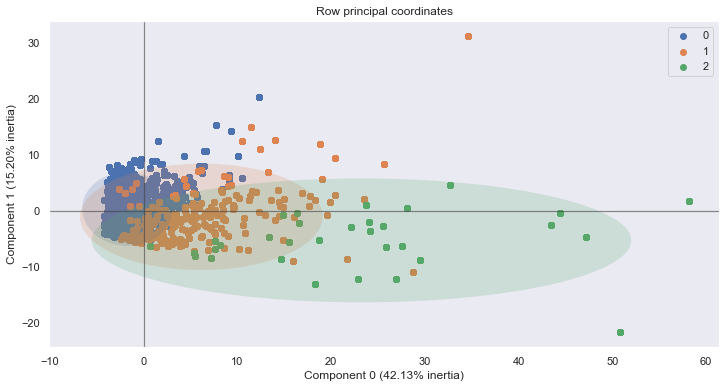

In [506]:
 ax = pca.plot_row_coordinates(
     X_train,
     ax=None,
     figsize=(12, 6),
     x_component=0,
     y_component=1,
     labels=None,
     color_labels=y_train,
     ellipse_outline=False,
     ellipse_fill=True,
     show_points=True
 )
#ax.get_figure().savefig('images/pca_row_coordinates.svg')


In [469]:
pca.explained_inertia_

array([0.4212857 , 0.15196032])

In [470]:
pca.eigenvalues_

array([33.70285576, 12.15682556])

In [471]:
pca.total_inertia_

79.99999999999999

In [472]:
pca.explained_inertia_

array([0.4212857 , 0.15196032])

In [473]:
pca.column_correlations(X_train)

0         1
acc_ab                     0.915585 -0.051861
acc_aca_orig               0.888771 -0.075544
acc_aca_orig_idf           0.918129 -0.131612
acc_at                     0.703671  0.324338
acc_b                      0.797634 -0.320101
acc_bg                     0.904515 -0.219493
acc_bg_mention             0.824651 -0.318149
acc_bp                     0.553431  0.595523
acc_bp_mention             0.593034  0.502283
acc_brs                    0.938286  0.098688
acc_bt                     0.786727  0.363672
acc_bt_mention             0.783124  0.211713
acc_datebac                0.931930 -0.113387
acc_debutpp                0.683235  0.058344
acc_finpp                  0.948477 -0.048458
acc_mention_nonrenseignee  0.556609  0.092465
acc_neobac                 0.943101 -0.119155
acc_pc                     0.299963  0.608848
acc_pp                     0.949909 -0.135935
acc_sansmention            0.843530  0.250921
acc_tb                     0.570640 -0.392563
acc_tot                    0.957229 -0.007044
acc_tot_f                  0.907458 -0.028193
capa_fin                   0.943545  0.037610
nb_cla_pc                  0.219510  0.630283
nb_cla_pp                  0.877765 -0.315957
nb_cla_pp_at               0.761576 -0.254596
nb_cla_pp_bg               0.856830 -0.360265
nb_cla_pp_bg_brs           0.895200 -0.258810
nb_cla_pp_bp               0.742946  0.172048
nb_cla_pp_bp_brs           0.711666  0.259302
nb_cla_pp_bt               0.841844 -0.042893
nb_cla_pp_bt_brs           0.844933  0.013383
nb_voe_pc                  0.075838  0.431419
nb_voe_pc_at               0.076306  0.441776
nb_voe_pc_bg               0.015080  0.224853
nb_voe_pc_bp               0.140662  0.607652
nb_voe_pc_bt               0.132333  0.481691
nb_voe_pp                  0.865783 -0.346063
nb_voe_pp_at               0.749545 -0.292719
nb_voe_pp_bg               0.842861 -0.387894
nb_voe_pp_bg_brs           0.889206 -0.284950
nb_voe_pp_bp               0.726871  0.171711
nb_voe_pp_bp_brs           0.684470  0.259777
nb_voe_pp_bt               0.839358 -0.051239
nb_voe_pp_bt_brs           0.843297  0.010554
pct_ab                     0.120879  0.158472
pct_aca_orig               0.141860  0.159427
pct_aca_orig_idf           0.184542  0.102532
pct_acc_datebac            0.146156 -0.474982
pct_acc_debutpp           -0.011450  0.053454
pct_acc_finpp              0.064772 -0.409745
pct_b                     -0.052003 -0.505047
pct_bg                    -0.022425 -0.794908
pct_bg_mention            -0.069535 -0.795427
pct_bours                  0.033241  0.544616
pct_bp                    -0.044162  0.627062
pct_bp_mention            -0.001938  0.524990
pct_bt                     0.076992  0.636709
pct_bt_mention             0.120325  0.361853
pct_f                     -0.040763 -0.055541
pct_mention_nonrenseignee -0.015546  0.088058
pct_neobac                 0.187376 -0.480213
pct_sansmention            0.050830  0.687152
pct_tb                    -0.109717 -0.535170
prop_tot                   0.927054  0.007361
prop_tot_at                0.720898  0.228426
prop_tot_bg                0.915734 -0.141251
prop_tot_bg_brs            0.924675 -0.008453
prop_tot_bp                0.559659  0.628044
prop_tot_bp_brs            0.499509  0.617229
prop_tot_bt                0.778530  0.382817
prop_tot_bt_brs            0.745167  0.428452
ran_grp1                   0.768819 -0.150301
taux_adm_psup             -0.069742  0.618110
taux_adm_psup_gen         -0.041681 -0.833352
taux_adm_psup_pro         -0.019276  0.696694
taux_adm_psup_techno       0.101069  0.692553
voe_tot                    0.875523 -0.305258
voe_tot_f                  0.836201 -0.298382

In [474]:
pca.row_contributions(X_train).head()

0         1
20691  0.127741  0.031871
39056  0.405002  0.350418
60875  0.098005  0.226919
54944  0.354830  0.767900
39045  0.136214  0.088445

In [475]:
pca.inverse_transform(pca.transform(X_train)).head()

0          1           2          3          4          5   \
20691  122.934386   6.139680  297.022133  30.413057   6.294566  23.921957   
39056   -4.822978   4.377672 -148.342765  42.946406   0.841848 -19.611760   
60875  214.304182  21.133580  556.460304  42.188101  26.659659  71.715598   
54944  130.475582  -1.184994  355.267105  18.455545  -2.289831  17.480613   
39045   79.417216   7.970689  134.862019  38.353437   7.352000  12.042393   

              6          7          8         9           10         11  \
20691  17.073674   1.845501  83.855623  2.676643   37.073390   8.865950   
39056 -22.380951   5.606920  72.897030  5.240252   -1.712741  19.593656   
60875  45.680364  10.114820  73.883660  4.844489  114.683120  25.561796   
54944  19.191928  -4.304555  94.135690  0.360992   12.387477  -4.948169   
39045   3.703439   5.066800  76.970200  4.258191   32.690167  16.833780   

               12         13         14         15         16         17  \
20691  265.471780   2.213092   6.304883  23.406880  27.481753   5.732705   
39056 -163.268128   3.048186  -1.381684  -4.459727   6.523046  10.755146   
60875  546.419693  12.742278  25.921789  77.301597  76.168546   9.839536   
54944  304.669312  -3.854570  -0.878798   6.679850  10.491670   1.271910   
39045  114.887039   4.467181   6.186155  19.927451  26.307962   8.806331   

              18         19          20          21          22         23  \
20691  66.217390   9.626878   34.396810  502.689529  449.503079  25.915899   
39056  68.222763  13.252409  -14.993965  -64.421468 -153.247799  26.962916   
60875  71.022694  45.652504  107.580460  960.560137  869.199663  26.560767   
54944  62.724021 -11.476179   16.833339  507.884462  491.237542  25.100247   
39045  68.005005  17.698196   24.275289  318.773441  242.177375  26.519251   

              24         25         26        27         28         29  \
20691   3.798442  17.581528   3.273159  0.824307   7.833828  19.591548   
39056   9.382215   9.848630   5.589212  1.040936  -3.188048  -8.059083   
60875  17.198165   8.991534  18.057658  0.966094  29.472383  68.942868   
54944  -5.939229  25.675823  -5.756554  0.651023   1.043752   5.225778   
39045   8.779395  12.447878   6.972481  0.950621   6.514631  15.408743   

              30        31         32          33         34          35  \
20691  27.201046  2.343112  86.115384   52.896658   5.487151  357.100979   
39056  28.607959  6.020503  81.720707  -18.183912   3.656647   90.886004   
60875  30.143682  6.563274  83.154076  115.150806  20.452634  693.206067   
54944  24.982045 -1.579260  89.676654   50.915967  -1.791613  293.997823   
39045  28.379309  4.808356  83.537850   30.706295   7.281127  292.216437   

              36         37         38         39         40        41  \
20691  85.208255  25.166989  34.307705  20.149794  62.645910  0.897130   
39056  73.390556  32.407431  56.305241 -14.765352  61.993988  0.530158   
60875  74.766877  31.853458  57.778952  71.844977  61.324138  5.298024   
54944  96.125288  18.321898  11.803790   7.755274  63.651542 -1.319723   
39045  77.838337  29.733582  48.740511  12.987726  62.107330  1.504731   

               42          43        44         45          46          47  \
20691  395.816083  224.946519  3.935123  30.217732   43.355714   47.506899   
39056 -180.423225   86.960742  8.266899 -10.998613    4.804042  -21.035826   
60875  846.110288  566.615989  9.173671  95.547010  133.506194  113.232000   
54944  409.179230  101.659383 -0.829875  13.257976   11.781879   42.517184   
39045  206.293799  220.959196  6.886392  22.525122   41.302040   27.116726   

              48          49         50        51         52        53  \
20691   9.114791  142.447477   7.135022  0.214651   2.642263  0.567495   
39056  14.999823   -1.315564  -0.580759  0.119826   2.763971  1.409203   
60875  14.993528  348.222961  26.576825  0.704027  10.973648  3.327789   
54944   3.310951   95.242327   0.059081 -0.007775  -1.918511 -1

In [207]:
drop_var = ['datasetid_x','recordid_x','record_timestamp_x','cle_disc','cle_disc','id_paysage','datasetid_y','datasetid_y','datasetid_y','session', 'cod_aff_form','lien_form_psup','g_olocalisation_des_formations', 'geometry.type','geometry.coordinates']

In [208]:
df = df.drop(drop_var,axis = 1)

KeyError: "['datasetid_x' 'recordid_x' 'record_timestamp_x' 'cle_disc' 'cle_disc'\n 'id_paysage' 'datasetid_y' 'datasetid_y' 'datasetid_y' 'session'\n 'cod_aff_form' 'lien_form_psup' 'g_olocalisation_des_formations'\n 'geometry.type' 'geometry.coordinates'] not found in axis"

In [209]:
df.head(2)

discipline  \
0  Ensemble formations juridiques, économiques et...   
1  Ensemble formations juridiques, économiques et...   

  salaire_brut_annuel_estime salaire_net_mensuel_regional_3eme_quartile  \
0                      27000                                       2240   
1                      27000                                       2240   

  salaire_net_mensuel_median_regional taux_de_reponse  \
0                                1860              78   
1                                1860              78   

  emplois_cadre_ou_professions_intermediaires taux_dinsertion  \
0                                          50              96   
1                                          50              96   

  emplois_exterieurs_a_la_region_de_luniversite emplois_stables      diplome  \
0                                            34              82  LICENCE PRO   
1                                            34              82  LICENCE PRO   

  salaire_net_median_des_emplois_a_temps_plein poids_de_la_discipline  \
0                                         1730                     49   
1                                         1730                     49   

  taux_de_chomage_regional code_du_domaine emplois_a_temps_plein  \
0                        9             DEG                    95   
1                        9             DEG                    95   

  code_de_la_discipline de_diplomes_boursiers academie        id  \
0                disc01                    14     Nice  0060931E   
1                disc01                    14     Nice  0060931E   

                      domaine nombre_de_reponses femmes  \
0  Droit, économie et gestion                 91     60   
1  Droit, économie et gestion                 91     60   

  salaire_net_mensuel_regional_1er_quartile                    cle_etab  \
0                                      1410  Nice - Sophia-Antipolis_18   
1                                      1410  Nice - Sophia-Antipolis_18   

  emplois_cadre                 situation annee            etablissement  \
0             7  18 mois après le diplôme  2018  Nice - Sophia-Antipolis   
1             7  18 mois après le diplôme  2018  Nice - Sophia-Antipolis   

  code_de_l_academie                                recordid_y  \
0                A23  d98b36d5cd0323b1d4c86f9a93820d7f88958ed1   
1                A23  00c3a7b4cc47665abc99a769e0272e6ebc8932b9   

                 record_timestamp_y  nb_voe_pp_at  nb_voe_pp_bp  nb_voe_pp_bg  \
0  2021-02-04T13:10:28.998000+00:00           3.0           0.0          28.0   
1  2021-02-04T13:10:28.998000+00:00          27.0           3.0          59.0   

   pct_sansmention                                    fil_lib_voe_acc  \
0             20.0  Langues, littératures & civilisations étrangèr...   
1              0.0     Sciences de l'Homme, Anthropologie, Ethnologie   

   acc_brs  acc_bg            tri  acc_bg_mention  \
0      0.0     5.0  1_universités             4.0   
1      3.0     5.0  1_universités             5.0   

                          form_lib_voe_acc     fili  prop_tot_bp_brs  \
0           Licence - Arts-lettres-langues  Licence              0.0   
1  Licence - Sciences humaines et sociales  Licence              1.0   

  acad_mies  taux_adm_psup_gen contrat_etab  pct_bp_mention  acc_finpp  \
0      Nice              100.0       Public             0.0        6.0   
1      Nice               87.0       Public             0.0        9.0   

   acc_pc  nb_cla_pp_bg  acc_bt  nb_cla_pp_bt_brs  nb_voe_pp_bt  \
0     3.0          26.0     0.0               0.0           0.0   
1    12.0          24.0     0.0               1.0           5.0   

   prop_tot_bg_brs  taux_adm_psup_pro  pct_aca_orig  prop_tot_bt  acc_pp  \
0              3.0                0.0          60.0          0.0     5.0   
1              5.0                7.0          40.0          3.0     3.0   

   voe_tot  nb_voe_pp                                   lib_comp_voe_ins  \
0    

In [211]:
drop_varlist = ['salaire_net_mensuel_regional_3eme_quartile', 
                'taux_de_reponse',
                'salaire_net_median_des_emplois_a_temps_plein',
                'poids_de_la_discipline',
                'emplois_exterieurs_a_la_region_de_luniversite',
                'code_du_domaine',
                'code_de_la_discipline',
                'salaire_net_mensuel_regional_1er_quartile',
                'annee',
                'situation']

In [213]:
df = df.drop(drop_varlist,axis = 1)

KeyError: "['salaire_net_mensuel_regional_3eme_quartile' 'taux_de_reponse'\n 'salaire_net_median_des_emplois_a_temps_plein' 'poids_de_la_discipline'\n 'emplois_exterieurs_a_la_region_de_luniversite' 'code_du_domaine'\n 'code_de_la_discipline' 'salaire_net_mensuel_regional_1er_quartile'\n 'annee' 'situation'] not found in axis"

In [214]:
df.head()

discipline  \
0   Ensemble formations juridiques, économiques et...   
1   Ensemble formations juridiques, économiques et...   
2   Ensemble formations juridiques, économiques et...   
11  Ensemble formations juridiques, économiques et...   
12  Ensemble formations juridiques, économiques et...   

   salaire_brut_annuel_estime salaire_net_mensuel_median_regional  \
0                       27000                                1860   
1                       27000                                1860   
2                       27000                                1860   
11                      27000                                1860   
12                      27000                                1860   

   emplois_cadre_ou_professions_intermediaires taux_dinsertion  \
0                                           50              96   
1                                           50              96   
2                                           50              96   
11                                          50              96   
12                                          50              96   

   emplois_stables      diplome taux_de_chomage_regional  \
0               82  LICENCE PRO                        9   
1               82  LICENCE PRO                        9   
2               82  LICENCE PRO                        9   
11              82  LICENCE PRO                        9   
12              82  LICENCE PRO                        9   

   emplois_a_temps_plein de_diplomes_boursiers academie        id  \
0                     95                    14     Nice  0060931E   
1                     95                    14     Nice  0060931E   
2                     95                    14     Nice  0060931E   
11                    95                    14     Nice  0060931E   
12                    95                    14     Nice  0060931E   

                       domaine nombre_de_reponses femmes  \
0   Droit, économie et gestion                 91     60   
1   Droit, économie et gestion                 91     60   
2   Droit, économie et gestion                 91     60   
11  Droit, économie et gestion                 91     60   
12  Droit, économie et gestion                 91     60   

                      cle_etab emplois_cadre            etablissement  \
0   Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
1   Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
2   Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
11  Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   
12  Nice - Sophia-Antipolis_18             7  Nice - Sophia-Antipolis   

   code_de_l_academie                                recordid_y  \
0                 A23  d98b36d5cd0323b1d4c86f9a93820d7f88958ed1   
1                 A23  00c3a7b4cc47665abc99a769e0272e6ebc8932b9   
2                 A23  991549d512f5a902310999795aa5e2fc9fd2bcb6   
11                A23  9f4070b45c6866100900135b01d5574636fc0491   
12                A23  fec76458fccfe95581fe53f609f120e3ed4a83da   

                  record_timestamp_y  nb_voe_pp_at  nb_voe_pp_bp  \
0   2021-02-04T13:10:28.998000+00:00           3.0           0.0   
1   2021-02-04T13:10:28.998000+00:00          27.0           3.0   
2   2021-02-04T13:10:28.998000+00:00         545.0          13.0   
11  2021-02-04T13:10:28.998000+00:00          31.0           0.0   
12  2021-02-04T13:10:28.998000+00:00         212.0           0.0   

    nb_voe_pp_bg  pct_sansmention  \
0           28.0        20.000000   
1           59.0         0.000000   
2         2902.0         0.000000   
11          61.0        66.666667   
12         421.0        11.764706   

                                      fil_lib_voe_acc  acc_brs  acc_bg  \
0   Langues, littératures & civilisations étrangèr...      0.0     5.0   
1      Sciences de l'Homme, Anthropologie, Ethnologie      3.0     5.0   
2            Parcours d'Accès Spécifique Santé (PASS)  

In [160]:
# Module pour diviser la base en 2
from sklearn.model_selection import train_test_split

In [161]:
trainset, testset = train_test_split(df, test_size=0.2, random_state=0)

In [162]:
trainset['voeux_class'].value_counts()

0    38787
1     7170
2     1027
Name: voeux_class, dtype: int64

In [163]:
testset['voeux_class'].value_counts()

0    9741
1    1763
2     243
Name: voeux_class, dtype: int64

In [231]:
def encodage(df):
    
    code = {"Autre formation" : 0,
            "BTS" : 1,
            "CPGE" : 2,
            "DUT" : 3,
            "EFTS" : 4,
            "Ecole d'Ingénieur" : 5,
            "Ecole de Commerce" : 6,
            "IFSI" : 7,
            "Licence" : 8,
            "Licence_Las" : 8,
            "PASS" : 9,
            "2_Lycées" : 1,
            "1_universités" : 2,
            "3_Autres formations" : 3,
            "":1} 
    
    for col in df.select_dtypes('object').columns:
        df.loc[:,col] = df[col].map(code)
        
    return df

In [241]:
def destring(df):
    var_qual = ['salaire_brut_annuel_estime',
            'salaire_net_mensuel_median_regional',
            'emplois_cadre_ou_professions_intermediaires', 
            'taux_dinsertion',
            'emplois_stables', 
            'taux_de_chomage_regional',
            'emplois_a_temps_plein', 
            'de_diplomes_boursiers', 
            'nombre_de_reponses', 
            'femmes']

    
    for col in var_qual:
        df.loc[:,col] = df[col].astype(float)
        
    return df

In [242]:
destring(df)

ValueError: could not convert string to float: 'ns'

In [246]:
df2.select_dtypes('object').columns

Index(['datasetid', 'recordid', 'record_timestamp', 'discipline',
       'salaire_brut_annuel_estime',
       'salaire_net_mensuel_regional_3eme_quartile',
       'salaire_net_mensuel_median_regional', 'cle_disc', 'taux_de_reponse',
       'etablissementactuel', 'emplois_cadre_ou_professions_intermediaires',
       'taux_dinsertion', 'emplois_exterieurs_a_la_region_de_luniversite',
       'emplois_stables', 'diplome',
       'salaire_net_median_des_emplois_a_temps_plein',
       'poids_de_la_discipline', 'taux_de_chomage_regional', 'code_du_domaine',
       'emplois_a_temps_plein', 'code_de_la_discipline',
       'de_diplomes_boursiers', 'academie', 'id', 'domaine',
       'nombre_de_reponses', 'femmes',
       'salaire_net_mensuel_regional_1er_quartile', 'cle_etab',
       'emplois_cadre', 'situation', 'annee', 'id_paysage', 'etablissement',
       'code_de_l_academie', 'remarque'],
      dtype='object')

In [248]:
df.dtypes.value_counts()

float64    80
object     35
int32       1
dtype: int64

In [230]:
['discipline', 
'salaire_brut_annuel_estime',
'salaire_net_mensuel_median_regional',
'emplois_cadre_ou_professions_intermediaires', 
'taux_dinsertion',
'emplois_stables', 
'diplome', 
'taux_de_chomage_regional',
'emplois_a_temps_plein', 
'de_diplomes_boursiers', 
'academie', 
'id',
'domaine', 
'nombre_de_reponses', 
'femmes', 
'cle_etab', 
'emplois_cadre',
'etablissement', 
'code_de_l_academie', 
'recordid_y',
'record_timestamp_y', 
'fil_lib_voe_acc', 'tri', 
'form_lib_voe_acc',
'fili', 'acad_mies', 
'contrat_etab', 
'lib_comp_voe_ins', 
'dep',
'g_ea_lib_vx', 
'region_etab_aff', 
'lib_grp1', 'dep_lib', 
'select_form',
'detail_forma']





['salaire_brut_annuel_estime',
 'salaire_net_mensuel_median_regional',
 'emplois_cadre_ou_professions_intermediaires',
 'taux_dinsertion',
 'emplois_stables',
 'taux_de_chomage_regional',
 'emplois_a_temps_plein',
 'de_diplomes_boursiers',
 'nombre_de_reponses',
 'femmes']

In [229]:
df['femmes']

0         60
1         60
2         60
11        60
12        60
13        60
14        60
15        60
21        60
22        60
24        60
26        60
27        60
28        60
33        60
37        60
38        60
39        60
40        60
41        60
44        60
46        60
47        60
49        60
51        60
52        60
53        60
54        60
57        60
61        ns
62        ns
63        ns
72        ns
73        ns
74        ns
75        ns
76        ns
82        ns
83        ns
85        ns
87        ns
88        ns
89        ns
94        ns
98        ns
99        ns
100       ns
101       ns
102       ns
105       ns
107       ns
108       ns
110       ns
112       ns
113       ns
114       ns
115       ns
118       ns
122       51
123       51
124       51
133       51
134       51
135       51
136       51
137       51
143       51
144       51
146       51
148       51
149       51
150       51
155       51
159       51
160       51
161       51
162       51

In [ ]:
def feature_engineering(df):
    df['est malade'] = df[viral_columns].sum(axis=1) >= 1
    df = df.drop(viral_columns, axis=1)
    return df

In [ ]:
def imputation(df):
    #df['is na'] = (df['Parainfluenza 3'].isna()) | (df['Leukocytes'].isna())
    #df = df.fillna(-999)
    df = df.dropna(axis=0)
    return  df

### selection des variables pertinentes
#### Variables presque constantes

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selecteur = VarianceThreshold(threshold=0.2)
selecteur.fit_transform(X)
selecteur.get_support()

#var_1 = df.columns[selecteur.get_support()]

In [154]:
X = df.drop(['voeux_class', 'voe_tot'])
y = df['voeux_class']

<PandasArray>
[1387510.8119110097]
Length: 1, dtype: float64

In [ ]:
X.var(axis = 0)

on supprime toutes les features qui ont une variance presque nulle

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selecteur = VarianceThreshold(threshold=0.2)
selecteur.fit_transform(X)
selecteur.get_support()

#var_1 = df.columns[selecteur.get_support()]

#### Test de dependance avec notre variable d'intéret

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif

##### Variables qualitatives et y

In [ ]:
## Selection des variables dépendantes grace au test du chi2
nb_var_chi2 = (chi2(X,y)[1]<0.05).sum()

chi2_filter = SelectKBest(chi2,nb_var_chi2)
chi2_filter.fit_transform(X,y)
chi2_filter.get_support()

##### Variables quantitatives et y

In [ ]:
## Selection des variables dépendantes grace au test ANOVA
nb_var_anova = (f_classif(X,y)[1]<0.05).sum()

anova_filter = SelectKBest(f_classif, k=nb_var_anova)
anova_filter.fit_transform(X,y)

anova_filter.get_support()

### Transformation des bases de données

In [460]:
data = df[df.select_dtypes(['float','int']).columns]
data.head()

nb_voe_pp_at  nb_voe_pp_bp  nb_voe_pp_bg  pct_sansmention  acc_brs  \
0            3.0           0.0          28.0        20.000000      0.0   
1           27.0           3.0          59.0         0.000000      3.0   
2          545.0          13.0        2902.0         0.000000     36.0   
11          31.0           0.0          61.0        66.666667      2.0   
12         212.0           0.0         421.0        11.764706      1.0   

    acc_bg  acc_bg_mention  prop_tot_bp_brs  taux_adm_psup_gen  \
0      5.0             4.0              0.0              100.0   
1      5.0             5.0              1.0               87.0   
2    167.0           167.0              0.0              100.0   
11     8.0             3.0              2.0               83.0   
12    17.0            15.0              0.0              100.0   

    pct_bp_mention  acc_finpp  acc_pc  nb_cla_pp_bg  acc_bt  nb_cla_pp_bt_brs  \
0              0.0        6.0     3.0          26.0     0.0               0.0   
1              0.0        9.0    12.0          24.0     0.0               1.0   
2              0.0      154.0     0.0        2902.0     0.0              38.0   
11             0.0       19.0     9.0          61.0     0.0               2.0   
12             0.0       24.0     0.0         299.0     0.0               0.0   

    nb_voe_pp_bt  prop_tot_bg_brs  taux_adm_psup_pro  pct_aca_orig  \
0            0.0              3.0                0.0         60.00   
1            5.0              5.0                7.0         40.00   
2          114.0             95.0                0.0         94.01   
11           5.0             13.0               17.0         88.89   
12          10.0             23.0                0.0         76.47   

    prop_tot_bt  acc_pp  voe_tot  nb_voe_pp  pct_acc_debutpp  prop_tot_bp  \
0           0.0     5.0     45.0       31.0            62.50          0.0   
1           3.0     3.0    190.0       94.0            13.33          1.0   
2           3.0   179.0   3574.0     3574.0            21.23          0.0   
11          6.0    15.0    144.0       97.0             0.00          2.0   
12          0.0    26.0    658.0      643.0             3.85          0.0   

       pct_tb  prop_tot_bt_brs  pct_mention_nonrenseignee  acc_ab  \
0   20.000000              0.0                        0.0     1.0   
1   40.000000              2.0                        0.0     2.0   
2   76.047904              1.0                        0.0     6.0   
11   0.000000              1.0                        0.0     1.0   
12  17.647059              0.0                        0.0    10.0   

    acc_aca_orig     pct_ab  nb_voe_pc_bp  pct_acc_finpp  nb_voe_pp_bg_brs  \
0            3.0  20.000000           1.0          75.00               3.0   
1            2.0  40.000000           4.0          60.00               8.0   
2          157.0   3.592814           0.0          86.03             464.0   
11           8.0  11.111111           3.0          79.17              14.0   
12          13.0  58.823529           0.0          92.31              69.0   

    nb_cla_pp_bp  ran_grp1      pct_bg  pct_bours  nb_voe_pc_at  \
0            0.0      28.0  100.000000       0.00          11.0   
1            1.0      44.0  100.000000      60.00          72.0   
2           13.0     813.0  100.000000      21.56           0.0   
11           0.0      96.0   88.888889      22.22          35.0   
12           0.0     381.0  100.000000       5.88          11.0   

    acc_aca_orig_idf  pct_f  acc_bt_mention  nb_cla_pp  prop_tot  \
0                3.0  75.00             0.0       28.0      30.0   
1                2.0  60.00             0.0       44.0      73.0   
2              157.0  72.63             0.0     3550.0     573.0   
11               8.0  70.83             0.0       97.0     105.0   
12              13.0  19.23             0.0      415.0     242.0   

    nb_voe_pc_bt  acc_datebac  acc_tot  nb_cla_pp_bg_brs  pct_bt  prop_tot_bg  \
0            1

In [461]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(data, test_size=0.2, random_state=0)

In [462]:
def preprocessing(df):
    
   # df = encodage(df)
   # df = feature_engineering(df)
   # df = imputation(df)
    
    X = df.drop('voeux_class', axis=1)
    y = df['voeux_class']
    
    print(y.value_counts())
    
    return X, y

In [463]:
X_train, y_train = preprocessing(trainset)
X_test, y_test = preprocessing(testset)

0    38787
1     7170
2     1027
Name: voeux_class, dtype: int64
0    9741
1    1763
2     243
Name: voeux_class, dtype: int64


## Procédure d'évaluation

In [264]:
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [265]:
def evaluation(model):
    
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    
    print(confusion_matrix(y_test, ypred))
    print(classification_report(y_test, ypred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train,
                                              cv=4, scoring='f1',
                                               train_sizes=np.linspace(0.1, 1, 10))
    
    
    plt.figure(figsize=(12, 8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()
    
    

## MODELISATION

In [266]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

In [267]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=10))

In [268]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [269]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

RandomForest
[[9741    0    0]
 [   0 1763    0]
 [   0    0  243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9741
           1       1.00      1.00      1.00      1763
           2       1.00      1.00      1.00       243

    accuracy                           1.00     11747
   macro avg       1.00      1.00      1.00     11747
weighted avg       1.00      1.00      1.00     11747



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

AdaBoost
[[9741    0    0]
 [   0 1763    0]
 [   0    0  243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9741
           1       1.00      1.00      1.00      1763
           2       1.00      1.00      1.00       243

    accuracy                           1.00     11747
   macro avg       1.00      1.00      1.00     11747
weighted avg       1.00      1.00      1.00     11747



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

SVM
[[9724   17    0]
 [  35 1728    0]
 [   0    0  243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9741
           1       0.99      0.98      0.99      1763
           2       1.00      1.00      1.00       243

    accuracy                           1.00     11747
   macro avg       1.00      0.99      0.99     11747
weighted avg       1.00      1.00      1.00     11747



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

KNN
[[9741    0    0]
 [   0 1763    0]
 [   0    0  243]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9741
           1       1.00      1.00      1.00      1763
           2       1.00      1.00      1.00       243

    accuracy                           1.00     11747
   macro avg       1.00      1.00      1.00     11747
weighted avg       1.00      1.00      1.00     11747



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

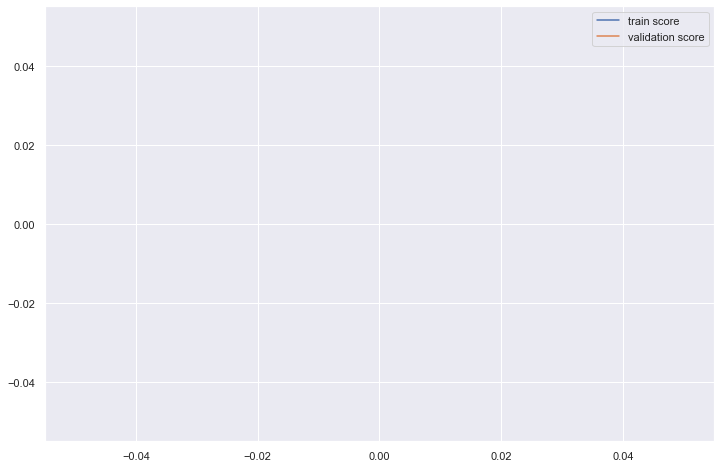

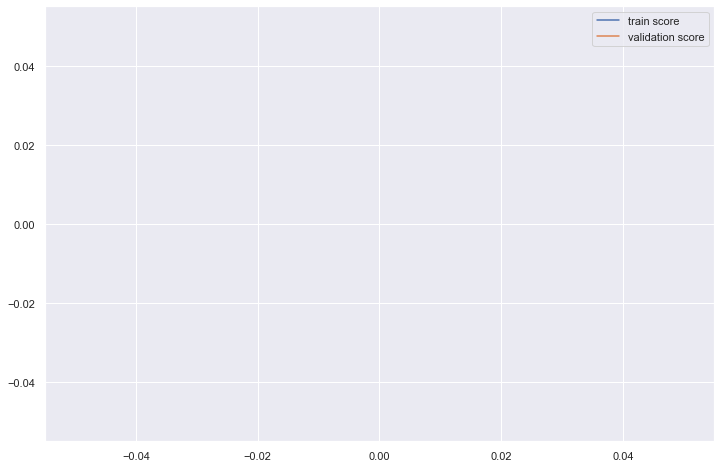

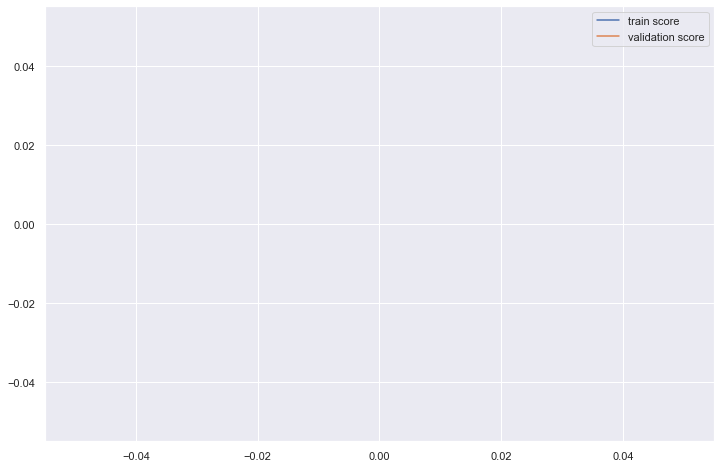

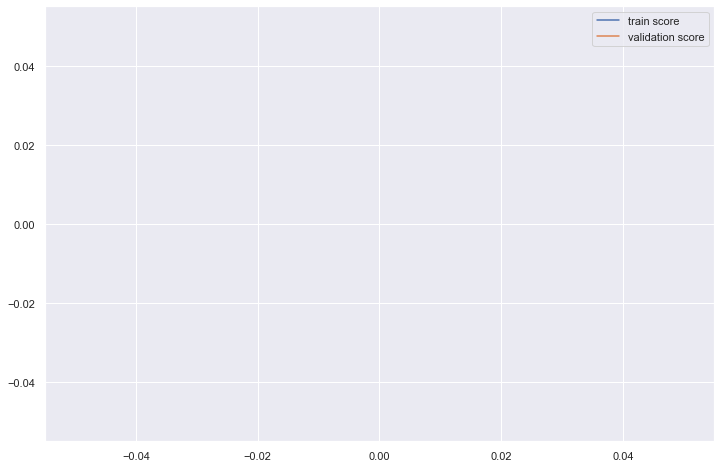

In [270]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

## OPTIMISATION DU MEILLEUR MODELE

In [276]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [277]:
SVM

Pipeline(steps=[('pipeline',
                 Pipeline(steps=[('polynomialfeatures',
                                  PolynomialFeatures(include_bias=False)),
                                 ('selectkbest', SelectKBest())])),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(random_state=0))])

In [278]:
hyper_params = {'svc__gamma':[1e-3, 1e-4, 0.0005],
                'svc__C':[1, 10, 100, 1000, 3000], 
               'pipeline__polynomialfeatures__degree':[2, 3],
               'pipeline__selectkbest__k': range(45, 60)}

In [279]:
grid = RandomizedSearchCV(SVM, hyper_params, scoring='recall', cv=4,
                          n_iter=40)

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 341, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 303, in _fit
    X, fitted_transformer = fit_transform_one_cached(
  File "C:\Users\Asus ZenBook\AppData\Roaming\Python\Python39\site-packages\joblib\memory.py", line 352, in __call__
    return self.func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\pipeline.py", line 754, in _fit_transform_one
    res = transformer.fit_transform(X,

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1774, in recall_score
    _, r, _, _ = prec

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]
  warnings.warn(


{'svc__gamma': 0.001, 'svc__C': 10, 'pipeline__selectkbest__k': 57, 'pipeline__polynomialfeatures__degree': 2}
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9741
           1       0.99      0.97      0.98      1763
           2       1.00      1.00      1.00       243

    accuracy                           0.99     11747
   macro avg       0.99      0.99      0.99     11747
weighted avg       0.99      0.99      0.99     11747



[[9718   23    0]
 [  51 1712    0]
 [   0    0  243]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      9741
           1       0.99      0.97      0.98      1763
           2       1.00      1.00      1.00       243

    accuracy                           0.99     11747
   macro avg       0.99      0.99      0.99     11747
weighted avg       0.99      0.99      0.99     11747



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 199, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 242, in _score
    return self._sign * self._score_func(y_true, y_pred,
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1071, in f1_score
    return fbeta_score(y_

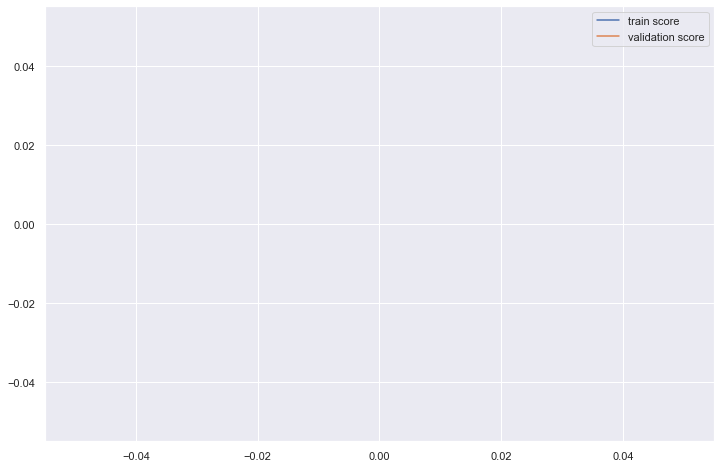

In [280]:
evaluation(grid.best_estimator_)

## Precision Recall Curve

In [283]:
from sklearn.metrics import precision_recall_curve

In [292]:
precision, recall, threshold = precision_recall_curve(y_test, grid.best_estimator_.decision_function(X_test))

ValueError: multiclass format is not supported

In [285]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

NameError: name 'threshold' is not defined

In [286]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [287]:
y_pred = model_final(grid.best_estimator_, X_test, threshold=-1)

In [288]:
from sklearn.metrics import recall_score

In [289]:
f1_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

In [290]:
recall_score(y_test, y_pred)

ValueError: Classification metrics can't handle a mix of multiclass and multilabel-indicator targets

### ------------------------------------- FIN ------------------------------------------------